# Creation of CSBC-ML: 6304 Data Set 

## Import of Libraries 

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set()

### Data Load

In [2]:
raw_data = pd.read_csv('final_data_6304.csv')
raw_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Molecule ChEMBL ID,Smiles,Mols,Standard Value
0,0,1,1,1,0,1,0,1,0,1,...,0,0,1,0,0,0,CHEMBL259084,O=C(O)c1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)c...,<rdkit.Chem.rdchem.Mol object at 0x0000018FF05...,6.400
1,1,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,CHEMBL224940,CCCCN1CCN(C(=O)c2cc(=O)c3c(O)cccc3o2)CC1,<rdkit.Chem.rdchem.Mol object at 0x0000018FF05...,27.000
2,2,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,CHEMBL2029910,CN1CCN(C(=O)c2cc(Nc3ncc4cc(-c5cncn5C)n(C5CCCC5...,<rdkit.Chem.rdchem.Mol object at 0x0000018FF05...,0.003
3,3,1,1,1,0,1,0,1,0,1,...,0,0,1,1,0,0,CHEMBL4794125,O=S(=O)(NCCCNc1nccc(-c2c(-c3cccc(F)c3)nc3sccn2...,<rdkit.Chem.rdchem.Mol object at 0x0000018FF05...,59.440
4,4,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,CHEMBL4860630,O=C(NCCO)c1ccc2c(c1)nc(Nc1cccc(Cl)c1)c1ccncc12,<rdkit.Chem.rdchem.Mol object at 0x0000018FF05...,72.920


In [3]:
data_morgan = raw_data.drop(['Unnamed: 0', 'Smiles', 'Mols','Molecule ChEMBL ID'], axis = 1)
data_morgan.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Standard Value
0,1,1,1,0,1,0,1,0,1,1,...,1,0,1,0,0,1,0,0,0,6.400
1,1,0,1,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,27.000
2,1,0,1,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0.003
3,1,1,1,0,1,0,1,0,1,1,...,1,1,0,0,0,1,1,0,0,59.440
4,1,1,1,1,1,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,72.920


In [4]:
data_morganf = pd.DataFrame(data_morgan)
data_morganf.to_csv('morgan_stv_6304.csv')
data_morganf.shape

(6304, 2049)

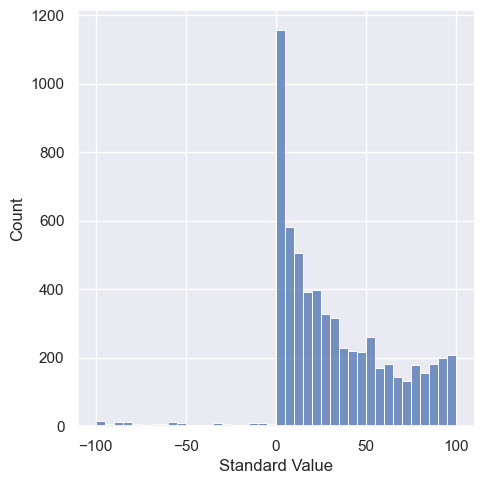

In [5]:
sns.displot(data_morganf['Standard Value'])

skewed data set could lead to statistical and modeling bias. Since predictions are based on weights,the right skewness could lead to overestimation. 

### Check For Skweness 

In [6]:
from scipy.stats import skew
# Compute skewness
print("Original Skewness:", skew(data_morganf['Standard Value']))

Original Skewness: 0.05384908408828756


- Skewness > 1 → Highly skewed, try Box-Cox or log transformation.
- Skewness between 0.5 and 1 → Moderately skewed, try square root.
- Skewness near 0 → No transformation needed.


Since the original skewness is close to zero therefore, there is no data transformation needed.

### Loading Top Bits Results

In [7]:
import glob

# Specify the directory where the chunk files are stored
directory_HI_VLI = r"C:\Road to PhD\Database\ranked_frequency_results_AB"
summary_HI_VLI = glob.glob(f"{directory_HI_VLI}/*.pkl")

# Load all chunks into a dictionary
summary_HI_VLI_dict = {}
for file in summary_HI_VLI:
    file_name = file.split("\\")[-1]  # Extract the filename (e.g., chunk_100_200.pkl)
    summary_HI_VLI_data = pd.read_pickle(file)
    summary_HI_VLI_dict[file_name] = summary_HI_VLI_data

# Access a specific chunk by its filename
specific_summary_HI = summary_HI_VLI_dict.get("final_ranked_frequency_AB_plus1.pkl")
if specific_summary_HI is not None:
    print("Specific Summary:")
    print(specific_summary_HI.head())
else:
    print("Chunk file not found in the loaded dictionary!")

# Save individual chunks or perform operations
#for name, data in chunk_dict.items():
   # print(f"Preview of {name}:")
    #print(data.head())

Specific Summary:
     Bit (+1)  Frequency (+1)
597       598          767936
1555     1556          673190
856       857          669664
1989     1990          653994
1154     1155          616200


In [8]:
import glob

# Specify the directory where the chunk files are stored
directory_MI_VLI = r"C:\Road to PhD\Database\ranked_frequency_results_AC"
summary_MI_VLI = glob.glob(f"{directory_MI_VLI}/*.pkl")

# Load all chunks into a dictionary
summary_MI_VLI_dict = {}
for file in summary_MI_VLI:
    file_name = file.split("\\")[-1]  # Extract the filename (e.g., chunk_100_200.pkl)
    summary_MI_VLI_data = pd.read_pickle(file)
    summary_MI_VLI_dict[file_name] = summary_MI_VLI_data

# Access a specific chunk by its filename
specific_summary_MI = summary_MI_VLI_dict.get("final_ranked_frequency_AC_plus1.pkl")
if specific_summary_MI is not None:
    print("Specific Summary:")
    print(specific_summary_MI.head())
else:
    print("Chunk file not found in the loaded dictionary!")

# Save individual chunks or perform operations
#for name, data in chunk_dict.items():
   # print(f"Preview of {name}:")
    #print(data.head())

Specific Summary:
      Bit (+1)  Frequency (+1)
1555      1556           15920
597        598           14782
1154      1155           14615
7            8           14526
5            6           13560


In [9]:
import glob

# Specify the directory where the chunk files are stored
directory_LI_VLI = r"C:\Road to PhD\Database\ranked_frequency_results_AD"
summary_LI_VLI = glob.glob(f"{directory_LI_VLI}/*.pkl")

# Load all chunks into a dictionary
summary_LI_VLI_dict = {}
for file in summary_LI_VLI:
    file_name = file.split("\\")[-1]  # Extract the filename (e.g., chunk_100_200.pkl)
    summary_LI_VLI_data = pd.read_pickle(file)
    summary_LI_VLI_dict[file_name] = summary_LI_VLI_data

# Access a specific chunk by its filename
specific_summary_LI = summary_LI_VLI_dict.get("final_ranked_frequency_AD_plus1.pkl")
if specific_summary_LI is not None:
    print("Specific Summary:")
    print(specific_summary_LI.head())
else:
    print("Chunk file not found in the loaded dictionary!")

# Save individual chunks or perform operations
#for name, data in chunk_dict.items():
   # print(f"Preview of {name}:")
    #print(data.head())

Specific Summary:
      Bit (+1)  Frequency (+1)
1555      1556           15600
0            1           14993
597        598           14896
7            8           14094
1154      1155           13616


In [10]:
import glob

# Specify the directory where the chunk files are stored
directory_NI_VLI = r"C:\Road to PhD\Database\ranked_frequency_results_AE"
summary_NI_VLI = glob.glob(f"{directory_NI_VLI}/*.pkl")

# Load all chunks into a dictionary
summary_NI_VLI_dict = {}
for file in summary_NI_VLI:
    file_name = file.split("\\")[-1]  # Extract the filename (e.g., chunk_100_200.pkl)
    summary_NI_VLI_data = pd.read_pickle(file)
    summary_NI_VLI_dict[file_name] = summary_NI_VLI_data

# Access a specific chunk by its filename
specific_summary_NI = summary_NI_VLI_dict.get("final_ranked_frequency_AE_plus1.pkl")
if specific_summary_NI is not None:
    print("Specific Summary:")
    print(specific_summary_NI.head())
else:
    print("Chunk file not found in the loaded dictionary!")

# Save individual chunks or perform operations
#for name, data in chunk_dict.items():
   # print(f"Preview of {name}:")
    #print(data.head())

Specific Summary:
      Bit (+1)  Frequency (+1)
856        857            2916
838        839            1972
1154      1155            1924
1216      1217            1922
1007      1008            1768


In [11]:
final_plus1_AE = summary_NI_VLI_dict.get("final_ranked_frequency_AE_plus1.pkl")
final_minus1_AE = summary_NI_VLI_dict.get("final_ranked_frequency_AE_minus1.pkl")
final_0_AE = summary_NI_VLI_dict.get("final_ranked_frequency_AE_0.pkl")
final_plus1_AE.iloc[:20]

final_plus1_AD = summary_LI_VLI_dict.get("final_ranked_frequency_AD_plus1.pkl")
final_minus1_AD = summary_LI_VLI_dict.get("final_ranked_frequency_AD_minus1.pkl")
final_0_AD = summary_LI_VLI_dict.get("final_ranked_frequency_AD_0.pkl")
final_plus1_AD.iloc[:20]

final_plus1_AC = summary_MI_VLI_dict.get("final_ranked_frequency_AC_plus1.pkl")
final_minus1_AC = summary_MI_VLI_dict.get("final_ranked_frequency_AC_minus1.pkl")
final_0_AC = summary_MI_VLI_dict.get("final_ranked_frequency_AC_0.pkl")

final_plus1_AB = summary_HI_VLI_dict.get("final_ranked_frequency_AB_plus1.pkl")
final_minus1_AB = summary_HI_VLI_dict.get("final_ranked_frequency_AB_minus1.pkl")
final_0_AB = summary_HI_VLI_dict.get("final_ranked_frequency_AB_0.pkl")

In [12]:
final_0_AB.iloc[:10]

,Bit (0),Frequency (0)
72,73,1272056
1148,1149,1269766
1430,1431,1269766
537,538,1267699
1124,1125,1265632
1650,1651,1265126
385,386,1264943
283,284,1263565
1279,1280,1262876
1999,2000,1262621


In [13]:
final_plus1_AB

,Bit (+1),Frequency (+1)
597,598,767936
1555,1556,673190
856,857,669664
1989,1990,653994
1154,1155,616200
...,...,...
1520,1521,3646
397,398,3640
72,73,0
1650,1651,0


In [14]:
final_plus1_AC

,Bit (+1),Frequency (+1)
1555,1556,15920
597,598,14782
1154,1155,14615
7,8,14526
5,6,13560
...,...,...
563,564,154
1011,1012,152
1430,1431,79
1224,1225,79


In [15]:
final_plus1_AB = final_plus1_AB.rename(columns=lambda x: x.split('_')[0] + "_AB")
final_plus1_AC = final_plus1_AC.rename(columns=lambda x: x.split('_')[0] + "_AC")
final_plus1_AD = final_plus1_AD.rename(columns=lambda x: x.split('_')[0] + "_AD")
final_plus1_AE = final_plus1_AE.rename(columns=lambda x: x.split('_')[0] + "_AE")

In [16]:


# Reset index for all DataFrames to ensure proper alignment
final_plus1_AB = final_plus1_AB.reset_index(drop=True)
final_plus1_AC = final_plus1_AC.reset_index(drop=True)
final_plus1_AD = final_plus1_AD.reset_index(drop=True)
final_plus1_AE = final_plus1_AE.reset_index(drop=True)

# Concatenate the DataFrames row-wise
subtracted_matrix_permutation_pos = pd.concat([final_plus1_AB, final_plus1_AC, final_plus1_AD, final_plus1_AE], axis=1)

subtracted_matrix_permutation_pos.iloc[:20]


,Bit (+1)_AB,Frequency (+1)_AB,Bit (+1)_AC,Frequency (+1)_AC,Bit (+1)_AD,Frequency (+1)_AD,Bit (+1)_AE,Frequency (+1)_AE
0,598,767936,1556.0,15920.0,1556.0,15600.0,857.0,2916.0
1,1556,673190,598.0,14782.0,1.0,14993.0,839.0,1972.0
2,857,669664,1155.0,14615.0,598.0,14896.0,1155.0,1924.0
3,1990,653994,8.0,14526.0,8.0,14094.0,1217.0,1922.0
4,1155,616200,6.0,13560.0,1155.0,13616.0,1008.0,1768.0
5,1085,611846,1.0,13536.0,792.0,13338.0,1990.0,1764.0
6,1,609248,857.0,13014.0,6.0,12720.0,6.0,1710.0
7,2039,606672,1723.0,12834.0,428.0,12450.0,805.0,1702.0
8,792,603936,428.0,12725.0,1085.0,12144.0,1731.0,1675.0
9,1083,602408,2044.0,12342.0,1723.0,11966.0,835.0,1650.0


In [19]:


# Reset index for all DataFrames to ensure proper alignment
final_plus1_AB = final_minus1_AB.reset_index(drop=True)
final_plus1_AC = final_minus1_AC.reset_index(drop=True)
final_plus1_AD = final_minus1_AD.reset_index(drop=True)
final_plus1_AE = final_minus1_AE.reset_index(drop=True)

# Concatenate the DataFrames row-wise
subtracted_matrix_permutation_neg = pd.concat([final_minus1_AB, final_minus1_AC, final_minus1_AD, final_minus1_AE], axis=1)

subtracted_matrix_permutation_neg.iloc[:20]
#subtracted_matrix_permutation_neg.to_csv('combined_ranked_commonbits.csv')
#print(f'Successfully Saved the file of {'combined_ranked_commonbits.csv'}')


,Bit (-1),Frequency (-1),Bit (-1),Frequency (-1),Bit (-1),Frequency (-1),Bit (-1),Frequency (-1)
791,792,335052,792.0,14800.0,792.0,12840.0,792.0,1640.0
1916,1917,334536,1917.0,14356.0,1917.0,15466.0,1917.0,2035.0
0,1,330252,1.0,11872.0,1.0,11008.0,1.0,1760.0
1082,1083,324800,1083.0,16100.0,1083.0,15318.0,1083.0,1564.0
1154,1155,318150,1155.0,11088.0,1155.0,12390.0,1155.0,1302.0
7,8,313484,8.0,9750.0,8.0,10050.0,8.0,1375.0
1084,1085,311190,1085.0,13596.0,1085.0,13167.0,1085.0,1584.0
545,546,299128,546.0,10983.0,546.0,10584.0,546.0,1281.0
2,3,297882,3.0,11362.0,3.0,11518.0,3.0,1404.0
2038,2039,296439,2039.0,10900.0,2039.0,11250.0,2039.0,1650.0


In [20]:
import pandas as pd

# Extract unique bit values from each DataFrame (all columns)
positive_bits = set(subtracted_matrix_permutation_pos.iloc[:20].filter(like="Bit").values.flatten())
negative_bits = set(subtracted_matrix_permutation_neg.iloc[:20].filter(like="Bit").values.flatten())

# Remove NaN values (caused by empty cells)
positive_bits = {bit for bit in positive_bits if pd.notna(bit)}
negative_bits = {bit for bit in negative_bits if pd.notna(bit)}

# Find common bits
common_bits = positive_bits.intersection(negative_bits)

# Convert to DataFrame for reporting
common_bits_df = pd.DataFrame({"Common Bits": list(common_bits)})

# Display or save the DataFrame
print(common_bits_df)
common_bits_df.to_csv("common_bits_report.csv", index=False)  # Optional: Save as CSV

    Common Bits
0             1
1             3
2          1155
3          1219
4             6
5           806
6             8
7          1990
8          1863
9          1917
10           19
11         1556
12         1085
13         2039
14          792
15         1850
16         1083
17         1723


In [21]:
import pandas as pd

# Ensure correct column selection
bit_AB = set(subtracted_matrix_permutation_pos["Bit (+1)_AB"].iloc[0:20].dropna().astype(int).tolist())
bit_AC = set(subtracted_matrix_permutation_pos["Bit (+1)_AC"].iloc[0:20].dropna().astype(int).tolist())
bit_AD = set(subtracted_matrix_permutation_pos["Bit (+1)_AD"].iloc[0:20].dropna().astype(int).tolist())
bit_AE = set(subtracted_matrix_permutation_pos["Bit (+1)_AE"].iloc[0:20].dropna().astype(int).tolist())

# Find correct intersections
common_AB_AC = sorted(bit_AB & bit_AC)
common_AB_AD = sorted(bit_AB & bit_AD)
common_AB_AE = sorted(bit_AB & bit_AE)

# Convert results into a DataFrame
common_bits_df = pd.DataFrame({
    "Common_AB_AC": pd.Series(common_AB_AC),
    "Common_AB_AD": pd.Series(common_AB_AD),
    "Common_AB_AE": pd.Series(common_AB_AE)
})

# Display the fixed results
print(common_bits_df)

# Save to CSV (optional)
common_bits_df.to_csv("common_bits_report.csv", index=False)

    Common_AB_AC  Common_AB_AD  Common_AB_AE
0              1           1.0           6.0
1              6           6.0         428.0
2              8           8.0         792.0
3             19         428.0         857.0
4             51         598.0        1083.0
5            428         792.0        1085.0
6            598         857.0        1155.0
7            792        1083.0        1217.0
8            857        1085.0        1556.0
9           1085        1155.0        1863.0
10          1155        1556.0        1990.0
11          1556        1990.0           NaN
12          1863        2039.0           NaN
13          1917           NaN           NaN
14          2039           NaN           NaN


In [21]:
common_bits_df.iloc[:20]

,Common_AB_AC,Common_AB_AD,Common_AB_AE
0,1,1.0,6.0
1,6,6.0,428.0
2,8,8.0,792.0
3,19,428.0,857.0
4,51,598.0,1083.0
5,428,792.0,1085.0
6,598,857.0,1155.0
7,792,1083.0,1217.0
8,857,1085.0,1556.0
9,1085,1155.0,1863.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3564\3400033489.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


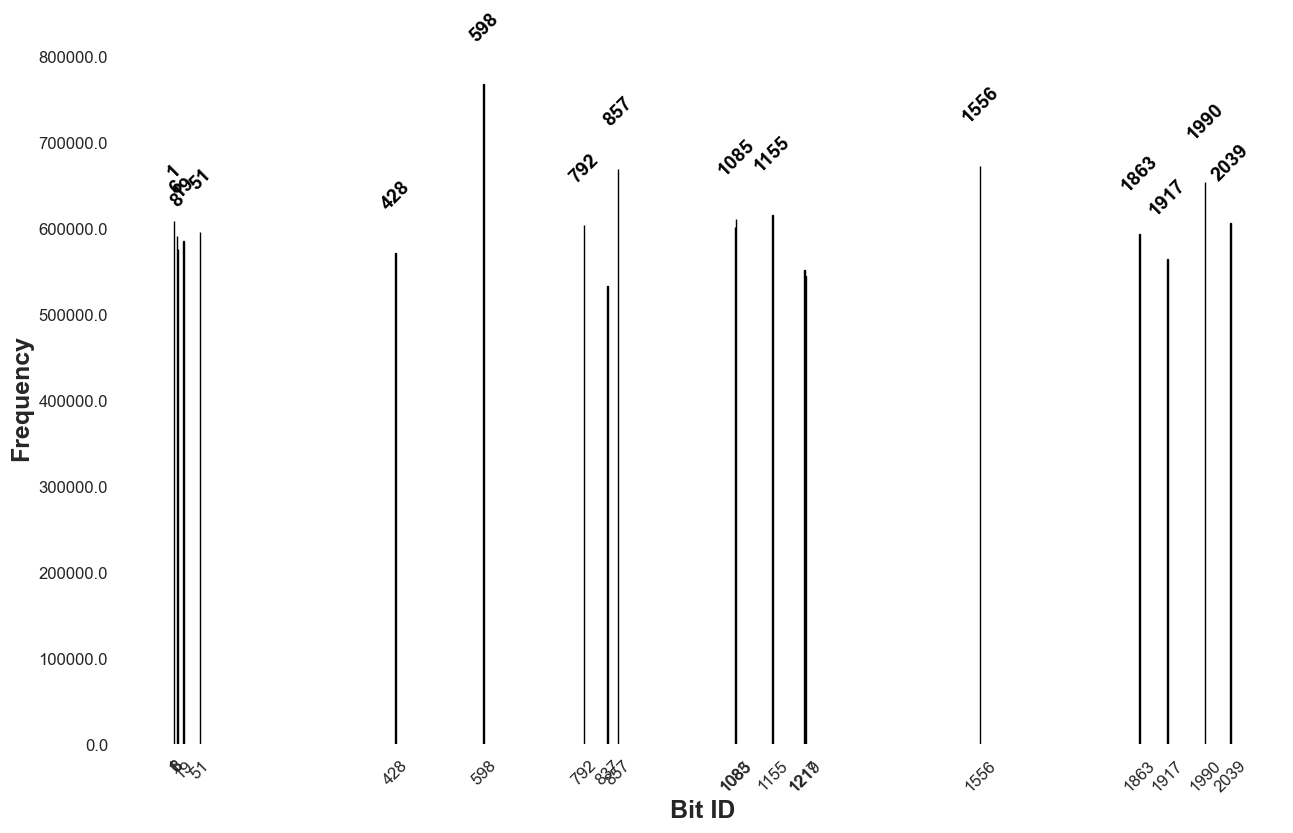

Plot saved successfully at C:\Road to PhD\Thesis Latex\bit_frequency_chart.png


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table (Extracted for plotting)
bit_ids = [598, 1556, 857, 1990, 1155, 1085, 1, 2039, 792, 1083, 51, 1863, 6, 19, 8, 428, 1917, 1217, 1219, 837]
frequencies = [767936, 673190, 669664, 653994, 616200, 611846, 609248, 606672, 603936, 602408, 595882, 593712, 591448, 585936, 576194, 572000, 565438, 551670, 545458, 533484]

# Most common bits to highlight
most_common_bits = [1, 6, 8, 19, 51, 428, 598, 792, 857, 1085, 1155, 1556, 1863, 1917, 2039, 1990]

# Define colors: Common bits highlighted, others in gray
bar_colors = ['red' if bit in most_common_bits else 'gray' for bit in bit_ids]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.bar(bit_ids, frequencies, color=bar_colors, edgecolor='black')

# Add labels and title
ax.set_xlabel("Bit ID", fontsize=18, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=18, fontweight='bold')

# Remove unnecessary background and grid
ax.set_facecolor('white')  # Set background to white
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border
ax.spines['left'].set_visible(False)  # Lighten left border
ax.spines['bottom'].set_visible(False)  # Lighten bottom border

# Improve label placement to reduce overlap
for bar, bit in zip(bars, bit_ids):
    if bit in most_common_bits:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50000, 
                str(bit), fontsize=14, fontweight='bold', ha='center', color='black', rotation=45)

# Adjust axis ticks for clarity
ax.set_xticks(bit_ids)
ax.set_xticklabels(bit_ids, fontsize=12, rotation=45)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Save as high-resolution image
output_path = r"C:\Road to PhD\Thesis Latex\bit_frequency_chart.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight', transparent=True)

# Display plot
plt.show()

print(f"Plot saved successfully at {output_path}")

<Figure size 640x480 with 0 Axes>

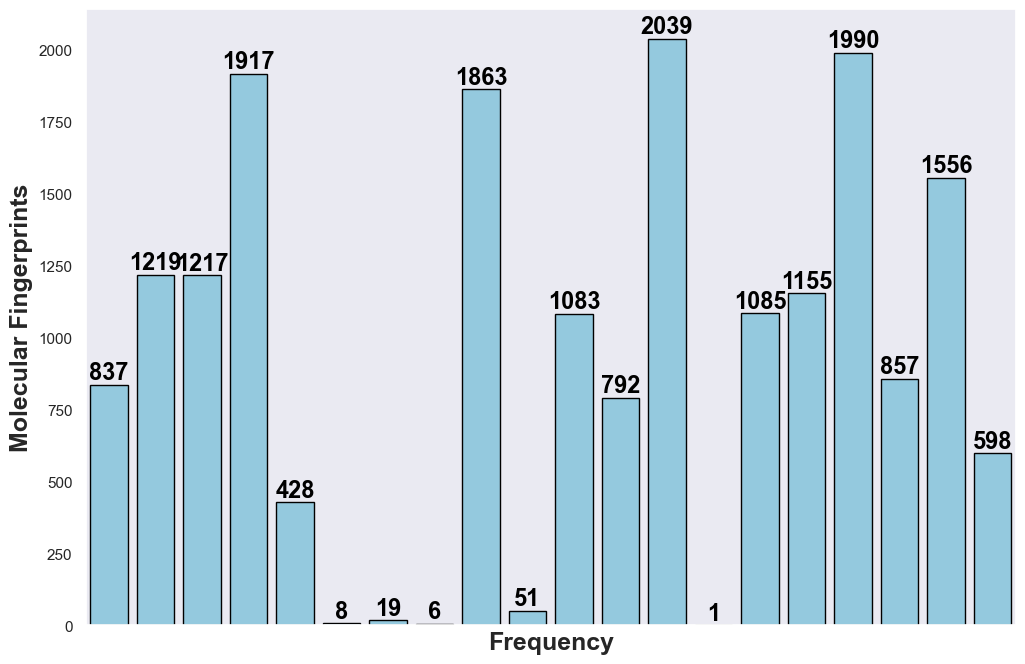

Plot saved successfully at C:\Road to PhD\Thesis Latex\bit_freq_chart.png


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert data into a pandas DataFrame
data = pd.DataFrame({'Bit ID': bit_ids, 'Frequency': frequencies})

# Sort data for better visualization
data = data.sort_values(by="Frequency", ascending=False)

# Set Seaborn theme for journal styling
sns.despine()

# Create a figure
plt.figure(figsize=(12, 8))

# Plot horizontal bar chart with automatic spacing
ax = sns.barplot(x="Frequency", y="Bit ID", data=data, color = "skyblue", edgecolor="black")
ax.grid(False)
# Format axis labels
ax.set_xlabel("Frequency", fontsize=18, fontweight='bold')
ax.set_ylabel("Molecular Fingerprints", fontsize=18, fontweight='bold')
#ax.set_title("Ranked Bit Frequency Distribution", fontsize=20, fontweight='bold')
for container in ax.containers:
    ax.bar_label(container, fontsize=17, fontweight='bold', color='black')  # Increase font size
plt.xticks([])  # Removes x-axis labels completely
# Save high-quality image
output_path = r"C:\Road to PhD\Thesis Latex\bit_freq_chart.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')

plt.show()

print(f"Plot saved successfully at {output_path}")

## Linear Regression 

In [24]:
X = data_morganf[['598',]]
y = data_morganf['Standard Value']

In [25]:

# Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Model Initialization and Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction and Evaluation
predictions = linear_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Linear Model Mean Squared Error:", mse)


Linear Model Mean Squared Error: 1038.3101146004738


## Logit

In [26]:
median_value = data_morganf['Standard Value'].median()
print("Median of Standard Value:", median_value)

Median of Standard Value: 24.415


In [27]:
import pandas as pd

# Calculate skewness for each numerical column
skewness_values = data_morganf['Standard Value'].skew()
print(skewness_values)  # Displays skewness for each feature

0.05386190106040618


In [28]:
threshold = 0 # % Inhibition Against HCT 116
target_binary = (data_morganf['Standard Value'] < threshold).astype(int)
X = data_morganf[['1','8','19','51','428','792','857','1085','1155','1556','1863','1917','2039','1990']] 


#'2039','51','1085','1083', '1917', '1155','837','598','1556','1990'
#X = data_morganf[[#'1556','857','1990','1155','1085','792','1083','1863','428','1217','1',
                 # '51', '1917', '1219','837','598',
                  #'1008','805','1731','835','485','1723','232']]
#'1556','857','1990','1155','1085','1','792','1083','1863','6','428','1217',
                  #'2039','51','19','8', '1917', '1219','837','598',
                  #'1008', '805', '1731','835','485','1723','3','232'

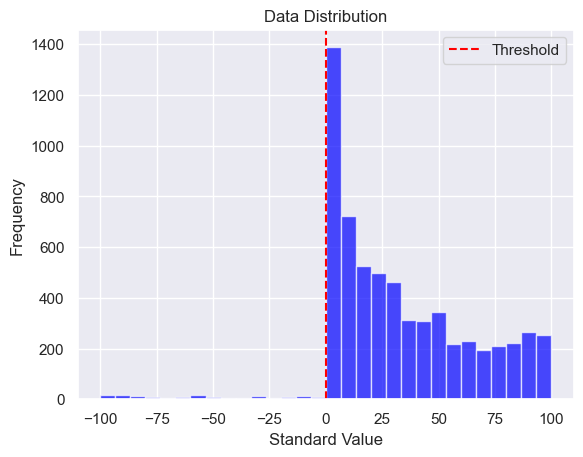

In [29]:
import matplotlib.pyplot as plt

plt.hist(data_morganf['Standard Value'], bins=30, alpha=0.7, color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', label="Threshold")
plt.xlabel("Standard Value")
plt.ylabel("Frequency")
plt.title("Data Distribution")
plt.legend()
plt.show()

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE for oversampling
smote = SMOTE(random_state=29)
X_resampled, y_resampled = smote.fit_resample(X, target_binary)

# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced Class Distribution:", dict(zip(unique, counts)))

# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=29)

Balanced Class Distribution: {0: 6155, 1: 6155}


In [31]:
threshold_new = y_resampled.median()
print("Updated Median Threshold:", threshold_new)

Updated Median Threshold: 0.5


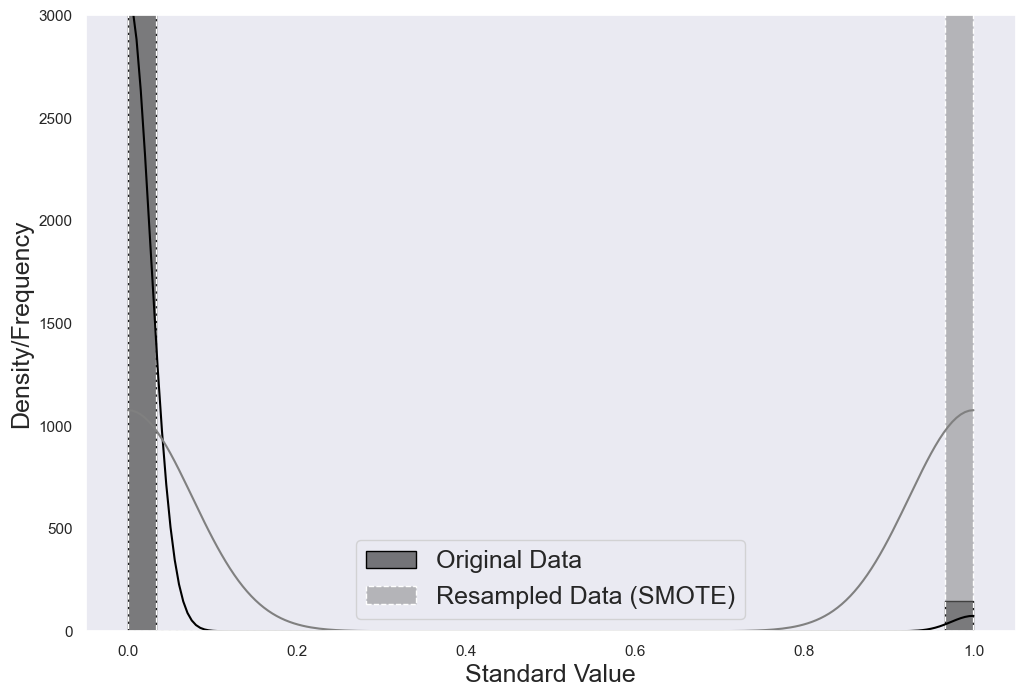

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

#sns.set_style("ticks")
# Histogram with KDE overlay for Original Data
sns.histplot(target_binary, element = 'step', color = 'black', linestyle = "-", bins=30, kde=True, fill = True, alpha=0.5, label="Original Data")

# Histogram with KDE overlay for Resampled Data
sns.histplot(y_resampled, bins=30, kde=True, color='grey', linestyle= "--", alpha=0.5, label="Resampled Data (SMOTE)")

plt.xlabel("Standard Value", fontsize = 18)
plt.ylabel("Density/Frequency", fontsize = 18)
plt.ylim(0, 3000)
#plt.title("Comparison of Distributions Before and After SMOTE", fontsize = 20)
plt.legend(fontsize = 18)
plt.grid()
#savepath = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\SMOTEbw.png"
#plt.savefig(savepath)
#print(f'Saved successfully on {savepath}')
plt.show()

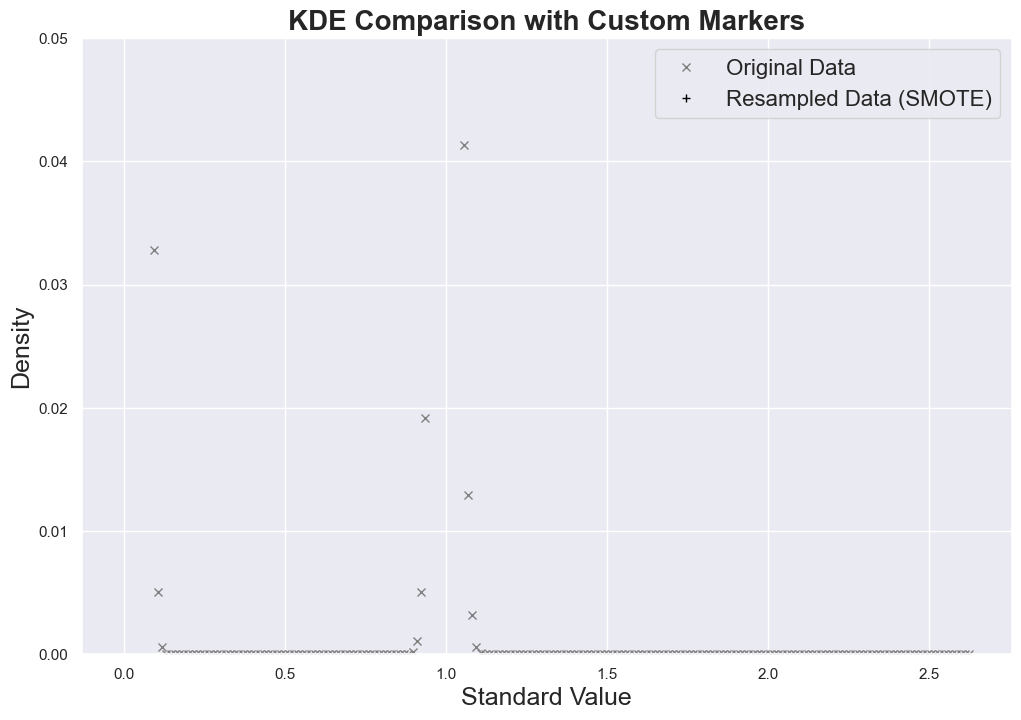

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

# Convert data to NumPy arrays
original_data = np.array(target_binary)
resampled_data = np.array(y_resampled)

# Compute KDEs
kde_orig = gaussian_kde(original_data)
kde_resampled = gaussian_kde(resampled_data)

# Define evaluation range
x_vals = np.linspace(min(original_data.min(), resampled_data.min()), 
                     max(original_data.max(), resampled_data.max()), 200)

# Evaluate densities
y_orig = kde_orig(x_vals)
y_resampled = kde_resampled(x_vals)

# Create figure
plt.figure(figsize=(12, 8))

# Plot original as gray "x" markers
plt.plot(x_vals, y_orig, linestyle='None', marker='x', color='gray', label="Original Data", markersize=6)

# Plot resampled as black "+" markers
plt.plot(x_vals, y_resampled, linestyle='None', marker='+', color='black', label="Resampled Data (SMOTE)", markersize=6)

# Customize plot
plt.xlabel("Standard Value", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.ylim(0, 0.05)  # Adjust based on your actual densities
plt.legend(fontsize=16)
plt.title("KDE Comparison with Custom Markers", fontsize=20, fontweight='bold')

plt.grid(True)
plt.show()

In [38]:
print("Original Median:", data_morganf['Standard Value'].median())
print("Resampled Median:", y_resampled.median())

Original Median: 24.415
Resampled Median: 0.5


In [39]:
import numpy as np

unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))  # Shows class distribution

{0: 1243, 1: 1219}


In [40]:
# Add a constant term to the input data for the intercept
x5 = sm.add_constant(X_train)

# Create the logistic regression model
reg_log = sm.Logit(y_train, x5)

# Fit the model
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.575586
         Iterations 6


In [41]:
# Output the summary of the logistic regression model
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Standard Value   No. Observations:                 9848
Model:                          Logit   Df Residuals:                     9833
Method:                           MLE   Df Model:                           14
Date:                Mon, 07 Jul 2025   Pseudo R-squ.:                  0.1696
Time:                        21:14:30   Log-Likelihood:                -5668.4
converged:                       True   LL-Null:                       -6826.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4062      0.079      5.126      0.000       0.251       0.562
1             -0.3376      0.051     -6.618      0.000      -0.438      -0.238
8             -0.4893      0.053     -9.196      0.000      -0.594      -0.385
19            -0.2216      0.056     -3.926      0.000      -0.332      -0.111
51            -0.8885      0.066    -13.478      0.000      -1.018      -0.759
428            0.5450      0.061      8.944      0.000       0.426       0.664
792           -0.0120      0.055     -0.218      0.827      -0.120       0.096
857            0.7129      0.054     13.281      0.000       0.608       0.818
1085          -0.3532      0.058     -6.069      0.000      -0.467      -0.239
1155           1.1961      0.070     17.032      0.000       1.058       1.334
1556          -0.6929      0.056    -12.305      0.000      -0.803      -0.583
1863          -0.2930      0.063     -4.626      0.000      -0.417      -0.169
1917          -0.7067      0.060    -11.802      0.000      -0.824      -0.589
2039          -1.5543      0.066    -23.585      0.000      -1.683      -1.425
1990          -0.2066      0.052     -4.008      0.000      -0.308      -0.106
==============================================================================
"""

### Equation from Logit 

#### Discussion of Weights of each Parameter 

### VIF

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
variables = X.astype(float)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,2.000402,1
1,1.690621,8
2,1.654141,19
3,1.737507,51
4,5.234312,428
5,2.108430,792
6,1.705259,857
7,1.869260,1085
8,3.989222,1155
9,4.431716,1556


### Prediction

In [97]:
np.set_printoptions(formatter ={'float': lambda x:'{0:0.1f}'.format(x)} )
binary_predictions = (results_log.predict() >= 0.5).astype(int)
print(binary_predictions)  # Converts probabilities to 0 or 1

[0 0 1 ... 1 1 1]


In [98]:
predictdata = results_log.predict()
predict_data = pd.DataFrame (predictdata, columns = ['Binary Prediction'])
#predict_data.to_csv('CSBC_train.csv')

In [99]:
np.array(target_binary)

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
results_log.pred_table()

array([[3360.0, 1552.0],
       [1343.0, 3593.0]])

In [101]:
cm_df = pd.DataFrame (results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0', 1:'Actual 1'})
cm_df


,Predicted 0,Predicted 1
Actual 0,3360.0,1552.0
Actual 1,1343.0,3593.0


In [102]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix (replace with your actual values)
# Format: [[TN, FP], [FN, TP]]
conf_matrix = np.array(cm_df)

# Extract individual components
TN, FP, FN, TP = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

In [103]:
accuracy_train_logit = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_train_logit:.4f}")

Accuracy: 0.7060


In [104]:
precision = TP / (TP + FP)
print(f"Precision: {precision:.2f}")

Precision: 0.70


In [105]:
recall = TP / (TP + FN)
print(f"Recall: {recall:.2f}")

Recall: 0.73


In [106]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.2f}")

F1 Score: 0.71


In [107]:
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.68


In [108]:
fnr = FN / (FN + TP)
print(f"False Negative Rate: {fnr:.2f}")

False Negative Rate: 0.27


In [109]:
fpr = FP / (FP + TN)
print(f"False Positive Rate: {fpr:.2f}")

False Positive Rate: 0.32


## Logit Version 2 Using Sklearn

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
threshold = 0 # % Inhibition Against HCT 116
target_binary = (data_morganf['Standard Value'] < threshold).astype(int)
X = data_morganf[['1','8','19','51','428','792','857','1085','1155','1556','1863','1917','2039','1990']] 

# Apply SMOTE for oversampling
smote = SMOTE(random_state=29)
X_resampled, y_resampled = smote.fit_resample(X, target_binary)

# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced Class Distribution:", dict(zip(unique, counts)))

# Split the resampled dataset
X_train_csbc, X_test_csbc, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=29)
#X_train, X_test, y_train, y_test = train_test_split(X, target_binary, random_state=29, test_size=0.2)

#'2039','51','1085','1083', '1917', '1155','837','598','1556','1990'
#X = data_morganf[[#'1556','857','1990','1155','1085','792','1083','1863','428','1217','1',
                 # '51', '1917', '1219','837','598',
                  #'1008','805','1731','835','485','1723','232']]
#'1556','857','1990','1155','1085','1','792','1083','1863','6','428','1217',
                  #'2039','51','19','8', '1917', '1219','837','598',
                  #'1008', '805', '1731','835','485','1723','3','232'

Balanced Class Distribution: {0: 6155, 1: 6155}


In [56]:
# Initialize and train logistic regression model
logit_model_csbc = LogisticRegression()
logit_model_csbc.fit(X_train_csbc, y_train)

# Predictions on training data
predictions_train_logit = logit_model_csbc.predict(X_train_csbc)

# Predictions on test data
predictions_train_logit = logit_model_csbc.predict(X_test_csbc)

In [57]:

# Predictions on training data
predictions_train_logit = logit_model_csbc.predict(X_train_csbc)

# Predictions on test data
predictions_test_logit = logit_model_csbc.predict(X_test_csbc)

conf_matrix = confusion_matrix(y_train, predictions_train_logit)
TN, FP, FN, TP = conf_matrix.ravel()

accuracy_train_logit = accuracy_score(y_train, predictions_train_logit)
print(f"Training Accuracy: {accuracy_train_logit:.4f}")

precision_train_logit = precision_score(y_train, predictions_train_logit, zero_division=0)
print(f"Precision: {precision_train_logit:.4f}")

recall_train_logit = recall_score(y_train, predictions_train_logit)
print(f"Recall: {recall_train_logit:.4f}")

f1_train_logit = f1_score(y_train, predictions_train_logit)
print(f"F1 Score: {f1_train_logit:.4f}")

specificity_train_logit = TN / (TN + FP)
print(f"Specificity: {specificity_train_logit:.4f}")

fnr_train_logit = FN / (FN + TP)
print(f"False Negative Rate: {fnr_train_logit:.4f}")

fpr_train_logit = FP / (FP + TN)
print(f"False Positive Rate: {fpr_train_logit:.4f}")

# Testing
accuracy_test_logit = accuracy_score(y_test, predictions_test_logit)
print(f"Training Accuracy: {accuracy_test_logit:.4f}")

precision_test_logit = precision_score(y_test, predictions_test_logit, zero_division=0)
print(f"Precision: {precision_test_logit:.4f}")

recall_test_logit = recall_score(y_test, predictions_test_logit)
print(f"Recall: {recall_test_logit:.4f}")

f1_test_logit = f1_score(y_test, predictions_test_logit)
print(f"F1 Score: {f1_test_logit:.4f}")

specificity_test_logit = TN / (TN + FP)
print(f"Specificity: {specificity_test_logit:.4f}")

fnr_test_logit = FN / (FN + TP)
print(f"False Negative Rate: {fnr_test_logit:.4f}")

fpr_test_logit = FP / (FP + TN)
print(f"False Positive Rate: {fpr_test_logit:.4f}")

Training Accuracy: 0.7061
Precision: 0.6985
Recall: 0.7279
F1 Score: 0.7129
Specificity: 0.6842
False Negative Rate: 0.2721
False Positive Rate: 0.3158
Training Accuracy: 0.7092
Precision: 0.6976
Recall: 0.7285
F1 Score: 0.7127
Specificity: 0.6842
False Negative Rate: 0.2721
False Positive Rate: 0.3158


In [58]:
X_train_csbc

,1,8,19,51,428,792,857,1085,1155,1556,1863,1917,2039,1990
6371,1,1,0,0,0,1,1,0,1,0,0,0,1,1
2340,1,1,0,0,0,1,0,1,1,0,1,1,1,0
11445,0,0,0,0,1,1,1,1,0,1,0,0,0,1
1702,0,0,0,0,0,0,1,0,1,0,1,1,0,1
1252,1,0,1,1,1,1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1,0,0,1,1,0,1,1,0,1,0,1,0,1
11810,0,1,0,0,0,0,0,0,1,0,1,1,0,1
10749,0,0,0,0,0,0,1,0,1,1,1,0,0,1
6380,1,1,0,0,1,1,1,0,1,0,0,0,1,1


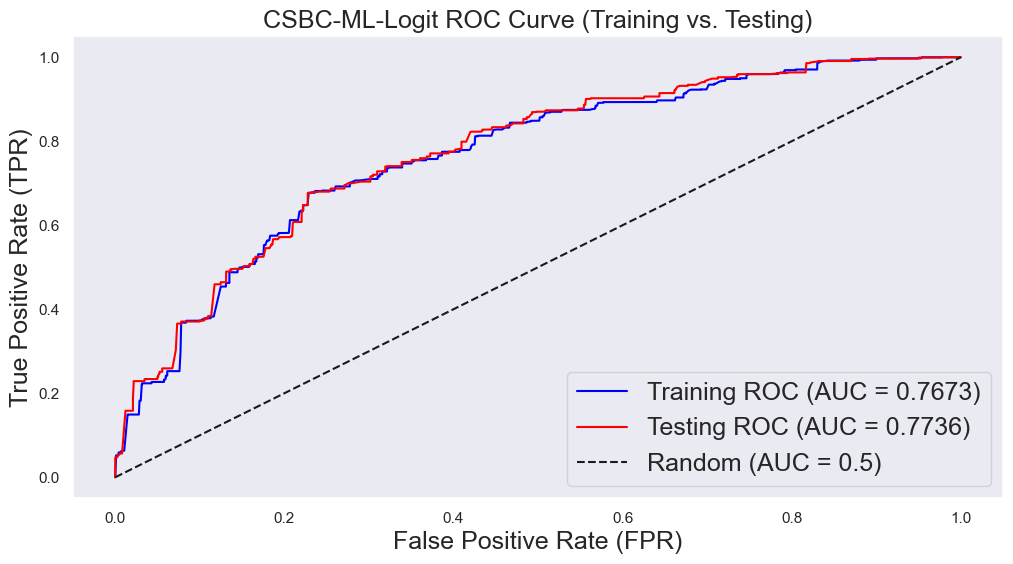

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob_csbc = logit_model_csbc.predict_proba(X_train_csbc)[:, 1]  # Probabilities for positive class
y_test_prob_csbc = logit_model_csbc.predict_proba(X_test_csbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train_csbc, tpr_train_csbc, _ = roc_curve(y_train, y_train_prob_csbc)
fpr_test_csbc, tpr_test_csbc, _ = roc_curve(y_test, y_test_prob_csbc)

# Compute AUC scores
auc_train_csbc = roc_auc_score(y_train, y_train_prob_csbc)
auc_test_csbc = roc_auc_score(y_test, y_test_prob_csbc)

# Plot ROC Curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_train_csbc, tpr_train_csbc, label=f'Training ROC (AUC = {auc_train_csbc:.4f})', color='blue')
plt.plot(fpr_test_csbc, tpr_test_csbc, label=f'Testing ROC (AUC = {auc_test_csbc:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)", fontsize = 18)
plt.ylabel("True Positive Rate (TPR)", fontsize = 18)
plt.title("CSBC-ML-Logit ROC Curve (Training vs. Testing)", fontsize = 18)
plt.legend(fontsize = 18)
plt.grid()
savepath =r'C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\ROC_logit.png'
plt.savefig(savepath)
plt.show()

In [1686]:
y_train.shape

(9848,)

In [1688]:
X_train.shape

(9848, 14)

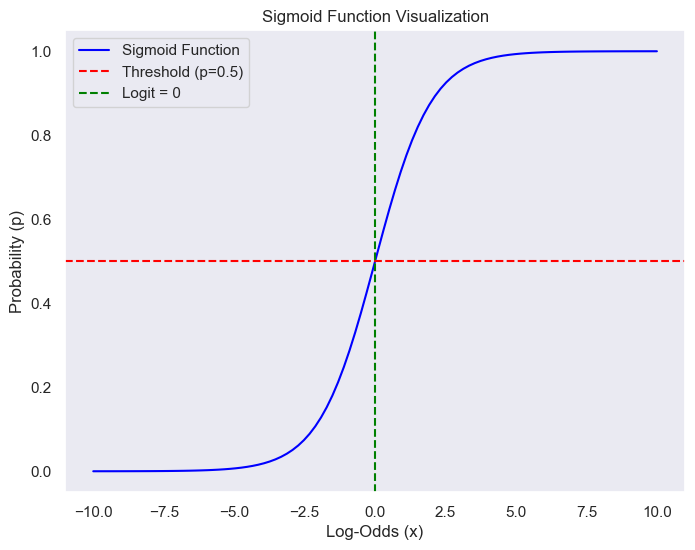

In [1646]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Sigmoid Function", color="blue")
plt.axhline(y=0.5, color="red", linestyle="--", label="Threshold (p=0.5)")
plt.axvline(x=0, color="green", linestyle="--", label="Logit = 0")
plt.xlabel("Log-Odds (x)")
plt.ylabel("Probability (p)")
plt.title("Sigmoid Function Visualization")
plt.legend()
plt.grid()
plt.show()

## PCA

In [1647]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## XGboost

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE for oversampling
smote = SMOTE(random_state=29)
X_resampled, y_resampled = smote.fit_resample(X, target_binary)

# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced Class Distribution:", dict(zip(unique, counts)))

# Split the resampled dataset
X_train_csbc, X_test_csbc, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=29)


# Model Initialization and Training
xgb_model_csbc = xgb.XGBClassifier()
xgb_model_csbc.fit(X_train_csbc, y_train)

# Predictions on Training and Test Data
predictions_train_xgb = xgb_model_csbc.predict(X_train_csbc)  # Training predictions
predictions_test_xgb = xgb_model_csbc.predict(X_test_csbc)    # Testing predictions

# Accuracy Calculation
accuracy_train_xgb = accuracy_score(y_train, predictions_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, predictions_test_xgb)

# Print the results
print(f"Training Accuracy: {accuracy_train_xgb:.4f}")
print(f"Testing Accuracy: {accuracy_test_xgb:.4f}")

Balanced Class Distribution: {0: 6155, 1: 6155}
Training Accuracy: 0.9560
Testing Accuracy: 0.9488


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on Training and Test Data
predictions_train_xgb = xgb_model_csbc.predict(X_train_csbc)  # Training predictions
predictions_test_xgb = xgb_model_csbc.predict(X_test_csbc)    # Testing predictions

# Compute Confusion Matrix for Training Data
conf_matrix_train_xgb = confusion_matrix(y_train, predictions_train_xgb)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train_xgb.ravel()

# Compute Confusion Matrix for Testing Data
conf_matrix_test_xgb = confusion_matrix(y_test, predictions_test_xgb)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test_xgb.ravel()

# Training Metrics
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if TP_train + FP_train != 0 else 0
recall_train = TP_train / (TP_train + FN_train) if TP_train + FN_train != 0 else 0
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if precision_train + recall_train != 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if TN_train + FP_train != 0 else 0
fnr_train = FN_train / (FN_train + TP_train) if FN_train + TP_train != 0 else 0
fpr_train = FP_train / (FP_train + TN_train) if FP_train + TN_train != 0 else 0

# Testing Metrics
accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if TP_test + FP_test != 0 else 0
recall_test = TP_test / (TP_test + FN_test) if TP_test + FN_test != 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test != 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if TN_test + FP_test != 0 else 0
fnr_test = FN_test / (FN_test + TP_test) if FN_test + TP_test != 0 else 0
fpr_test = FP_test / (FP_test + TN_test) if FP_test + TN_test != 0 else 0

# Print Training Results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Training Specificity: {specificity_train:.4f}")
print(f"Training False Negative Rate (FNR): {fnr_train:.4f}")
print(f"Training False Positive Rate (FPR): {fpr_train:.4f}")

# Print Testing Results
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing False Negative Rate (FNR): {fnr_test:.4f}")
print(f"Testing False Positive Rate (FPR): {fpr_test:.4f}")

Training Accuracy: 0.9560
Training Precision: 0.9347
Training Recall: 0.9808
Training F1 Score: 0.9572
Training Specificity: 0.9312
Training False Negative Rate (FNR): 0.0192
Training False Positive Rate (FPR): 0.0688
Testing Accuracy: 0.9488
Testing Precision: 0.9240
Testing Recall: 0.9770
Testing F1 Score: 0.9498
Testing Specificity: 0.9212
Testing False Negative Rate (FNR): 0.0230
Testing False Positive Rate (FPR): 0.0788


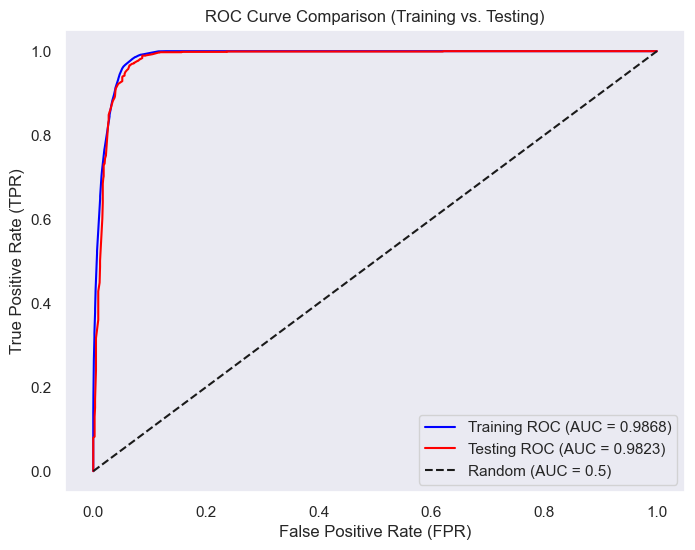

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob = xgb_model_csbc.predict_proba(X_train_csbc)[:, 1]  # Probabilities for positive class
y_test_prob = xgb_model_csbc.predict_proba(X_test_csbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid(False)
plt.show()

### Optimization of Xgboost

In [1467]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the DMatrix for XGBoost (used internally for computation)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define Parameters for Boosting Framework
params = {
    'objective': 'binary:logistic',  # For binary classification
    'learning_rate': 0.1,           # Step size for boosting
    'max_depth': 3,                 # Depth of each tree
    'eval_metric': 'logloss'        # Evaluation metric (log-loss for classification)
}

# Model Construction Using Boosting Framework
model = xgb.train(params, dtrain, num_boost_round=100)  # num_boost_round sets number of iterations
predictions = model.predict(dtest)

In [1468]:
# Train the XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate Predictions
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5832832230907997


In [1440]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [5, 7, 10],           
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.8, 1.0]
}

# XGBoost with GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=29), param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 150, 'subsample': 1.0}
Best Accuracy: 0.5857624429902835


## Random Forest Model 

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Model Initialization and Training
rf_model_csbc = RandomForestClassifier(n_estimators=100, random_state=29)
rf_model_csbc.fit(X_train_csbc, y_train)

# Predictions on Training and Test Data
predictions_train_rf = rf_model_csbc.predict(X_train_csbc)  # Training predictions
predictions_test_rf = rf_model_csbc.predict(X_test_csbc)    # Testing predictions

# Accuracy Calculation
accuracy_train_rf = accuracy_score(y_train, predictions_train_rf)
accuracy_test_rf = accuracy_score(y_test, predictions_test_rf)

# Print the results
print(f"Training Accuracy: {accuracy_train_rf:.4f}")
print(f"Testing Accuracy: {accuracy_test_rf:.4f}")

Training Accuracy: 0.9562
Testing Accuracy: 0.9484


In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on Training and Test Data
predictions_train_rf = rf_model_csbc.predict(X_train_csbc)  # Training predictions
predictions_test_rf = rf_model_csbc.predict(X_test_csbc)    # Testing predictions

# Compute Confusion Matrix for Training Data
conf_matrix_train_rf = confusion_matrix(y_train, predictions_train_rf)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train_rf.ravel()

# Compute Confusion Matrix for Testing Data
conf_matrix_test_rf = confusion_matrix(y_test, predictions_test_rf)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test_rf.ravel()

# Training Metrics
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if TP_train + FP_train != 0 else 0
recall_train = TP_train / (TP_train + FN_train) if TP_train + FN_train != 0 else 0
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if precision_train + recall_train != 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if TN_train + FP_train != 0 else 0
fnr_train = FN_train / (FN_train + TP_train) if FN_train + TP_train != 0 else 0
fpr_train = FP_train / (FP_train + TN_train) if FP_train + TN_train != 0 else 0

# Testing Metrics
accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if TP_test + FP_test != 0 else 0
recall_test = TP_test / (TP_test + FN_test) if TP_test + FN_test != 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test != 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if TN_test + FP_test != 0 else 0
fnr_test = FN_test / (FN_test + TP_test) if FN_test + TP_test != 0 else 0
fpr_test = FP_test / (FP_test + TN_test) if FP_test + TN_test != 0 else 0

# Print Training Results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Training Specificity: {specificity_train:.4f}")
print(f"Training False Negative Rate (FNR): {fnr_train:.4f}")
print(f"Training False Positive Rate (FPR): {fpr_train:.4f}")

# Print Testing Results
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing False Negative Rate (FNR): {fnr_test:.4f}")
print(f"Testing False Positive Rate (FPR): {fpr_test:.4f}")

Training Accuracy: 0.9562
Training Precision: 0.9348
Training Recall: 0.9812
Training F1 Score: 0.9574
Training Specificity: 0.9312
Training False Negative Rate (FNR): 0.0188
Training False Positive Rate (FPR): 0.0688
Testing Accuracy: 0.9484
Testing Precision: 0.9233
Testing Recall: 0.9770
Testing F1 Score: 0.9494
Testing Specificity: 0.9204
Testing False Negative Rate (FNR): 0.0230
Testing False Positive Rate (FPR): 0.0796


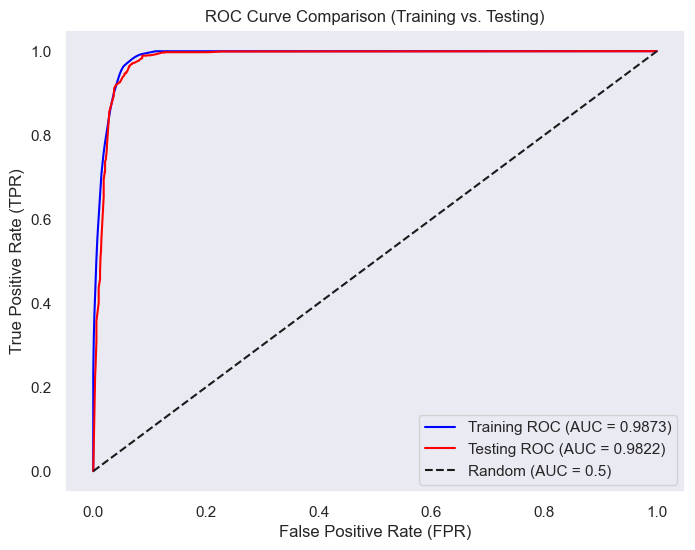

In [1849]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob = rf_model_csbc.predict_proba(X_train_csbc)[:, 1]  # Probabilities for positive class
y_test_prob = rf_model_csbc.predict_proba(X_test_csbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid()
plt.show()

## Suport Vector Machine

In [180]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Model Initialization and Training
svm_model_csbc = SVC(kernel='rbf', probability= True)  # Using RBF kernel for non-linear classification
svm_model_csbc.fit(X_train_csbc, y_train)

# Predictions on Training and Test Data
predictions_train_svm = svm_model_csbc.predict(X_train_csbc)  # Training predictions
predictions_test_svm = svm_model_csbc.predict(X_test_csbc)    # Testing predictions

# Accuracy Calculation
accuracy_train_svm = accuracy_score(y_train, predictions_train_svm)
accuracy_test_svm = accuracy_score(y_test, predictions_test_svm)

# Print the results
print(f"Training Accuracy: {accuracy_train_svm:.4f}")
print(f"Testing Accuracy: {accuracy_test_svm:.4f}")

Training Accuracy: 0.9476
Testing Accuracy: 0.9435


In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on Training and Test Data
predictions_train_svm = svm_model_csbc.predict(X_train_csbc)  # Training predictions
predictions_test_svm = svm_model_csbc.predict(X_test_csbc)    # Testing predictions

# Compute Confusion Matrix for Training Data
conf_matrix_train_svm = confusion_matrix(y_train, predictions_train_svm)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train_svm.ravel()

# Compute Confusion Matrix for Testing Data
conf_matrix_test_svm = confusion_matrix(y_test, predictions_test_svm)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test_svm.ravel()

# Training Metrics
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if TP_train + FP_train != 0 else 0
recall_train = TP_train / (TP_train + FN_train) if TP_train + FN_train != 0 else 0
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if precision_train + recall_train != 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if TN_train + FP_train != 0 else 0
fnr_train = FN_train / (FN_train + TP_train) if FN_train + TP_train != 0 else 0
fpr_train = FP_train / (FP_train + TN_train) if FP_train + TN_train != 0 else 0

# Testing Metrics
accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if TP_test + FP_test != 0 else 0
recall_test = TP_test / (TP_test + FN_test) if TP_test + FN_test != 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test != 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if TN_test + FP_test != 0 else 0
fnr_test = FN_test / (FN_test + TP_test) if FN_test + TP_test != 0 else 0
fpr_test = FP_test / (FP_test + TN_test) if FP_test + TN_test != 0 else 0

# Print Training Results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Training Specificity: {specificity_train:.4f}")
print(f"Training False Negative Rate (FNR): {fnr_train:.4f}")
print(f"Training False Positive Rate (FPR): {fpr_train:.4f}")

# Print Testing Results
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing False Negative Rate (FNR): {fnr_test:.4f}")
print(f"Testing False Positive Rate (FPR): {fpr_test:.4f}")

Training Accuracy: 0.9476
Training Precision: 0.9283
Training Recall: 0.9704
Training F1 Score: 0.9489
Training Specificity: 0.9247
Training False Negative Rate (FNR): 0.0296
Training False Positive Rate (FPR): 0.0753
Testing Accuracy: 0.9435
Testing Precision: 0.9239
Testing Recall: 0.9655
Testing F1 Score: 0.9442
Testing Specificity: 0.9220
Testing False Negative Rate (FNR): 0.0345
Testing False Positive Rate (FPR): 0.0780


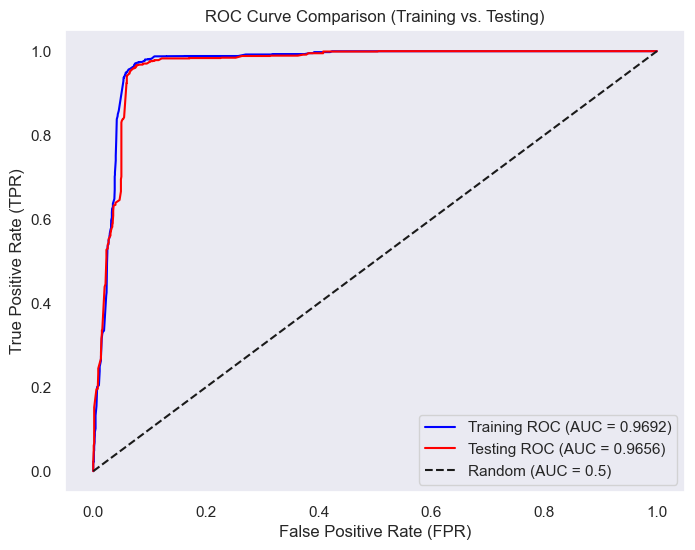

In [1852]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob = svm_model_csbc.predict_proba(X_train_csbc)[:, 1]  # Probabilities for positive class
y_test_prob = svm_model_csbc.predict_proba(X_test_csbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid()
plt.show()

In [1661]:
models = {'Logit Model': accuracy_train_logit, 'XGBoost': accuracy_train_xgb, 'Random Forest': accuracy_train_rf, 'SVM': accuracy_train_svm}
for name, score in models.items():
    print(f"{name} Accuracy: {score}")

Logit Model Accuracy: 0.7060316815597075
XGBoost Accuracy: 0.9560316815597075
Random Forest Accuracy: 0.9562347684809098
SVM Accuracy: 0.9476035743298131


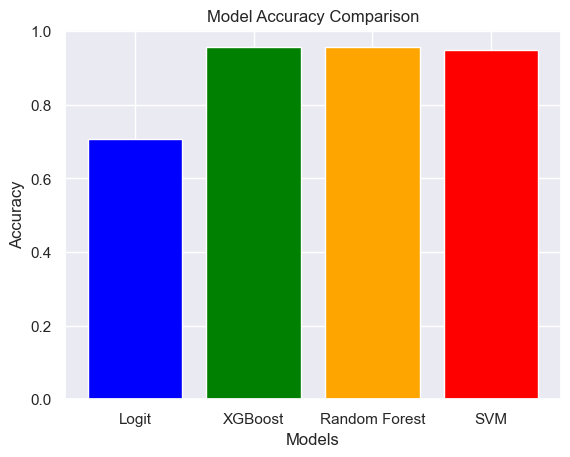

In [1655]:
import matplotlib.pyplot as plt

model_names = ['Logit', 'XGBoost', 'Random Forest', 'SVM']
model_scores = [accuracy_train_logit, accuracy_train_xgb, accuracy_train_rf, accuracy_train_svm]

plt.bar(model_names, model_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Creation of CBC-ML: 6304 Data Set 

## Data Loading and Setting 

In [48]:
threshold = 0 # % Inhibition Against HCT 116
target_binary = (data_morganf['Standard Value'] < threshold).astype(int)
X_CBC = data_morganf[['2040','2017','0','2','1155','1556','4','6','598','428']] 


#'2039','51','1085','1083', '1917', '1155','837','598','1556','1990'
#X = data_morganf[[#'1556','857','1990','1155','1085','792','1083','1863','428','1217','1',
                 # '51', '1917', '1219','837','598',
                  #'1008','805','1731','835','485','1723','232']]
#'1556','857','1990','1155','1085','1','792','1083','1863','6','428','1217',
                  #'2039','51','19','8', '1917', '1219','837','598',
                  #'1008', '805', '1731','835','485','1723','3','232'

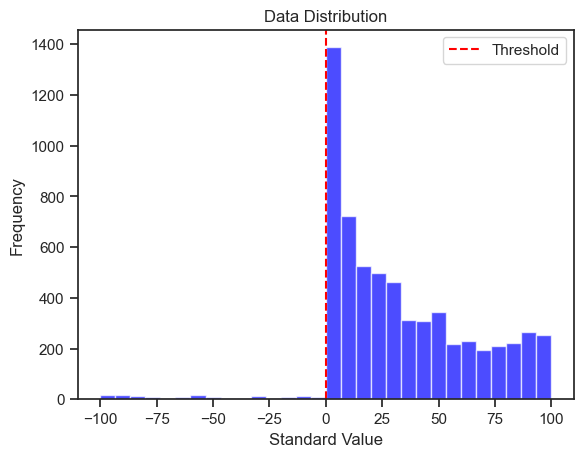

In [68]:
import matplotlib.pyplot as plt

plt.hist(data_morganf['Standard Value'], bins=30, alpha=0.7, color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', label="Threshold")
plt.xlabel("Standard Value")
plt.ylabel("Frequency")
plt.title("Data Distribution")
plt.legend()
plt.show()

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE for oversampling
smote = SMOTE(random_state=29)
X_resampled, y_resampled = smote.fit_resample(X_CBC, target_binary)

# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced Class Distribution:", dict(zip(unique, counts)))

# Split the resampled dataset
X_train_cbc, X_test_cbc, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=29)

Balanced Class Distribution: {0: 6155, 1: 6155}


In [70]:
X_train_cbc

,2040,2017,0,2,1155,1556,4,6,598,428
6371,1,1,1,1,1,0,1,1,1,0
2340,1,1,1,1,1,0,1,1,0,0
11445,0,1,1,1,0,1,1,0,0,1
1702,1,1,1,1,1,0,1,1,0,0
1252,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
808,1,1,1,1,0,1,1,1,1,1
11810,1,1,1,1,1,0,1,1,0,0
10749,1,1,1,1,1,1,1,1,0,0
6380,1,1,1,1,1,0,1,1,1,1


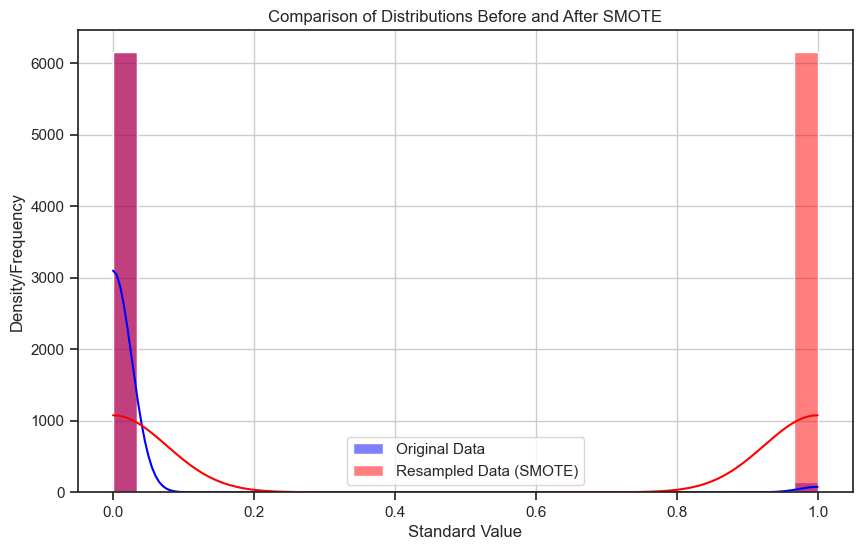

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Histogram with KDE overlay for Original Data
sns.histplot(target_binary, bins=30, kde=True, color='blue', alpha=0.5, label="Original Data")

# Histogram with KDE overlay for Resampled Data
sns.histplot(y_resampled, bins=30, kde=True, color='red', alpha=0.5, label="Resampled Data (SMOTE)")

plt.xlabel("Standard Value")
plt.ylabel("Density/Frequency")
plt.title("Comparison of Distributions Before and After SMOTE")
plt.legend()
plt.grid()
plt.show()

In [72]:
print("Original Median:", data_morganf['Standard Value'].median())
print("Resampled Median:", y_resampled.median())

Original Median: 24.415
Resampled Median: 0.5


In [73]:
#X_train, X_test, y_train, y_test = train_test_split(X, target_binary, random_state=29, test_size=0.2)

#### Discussion of Weights of each Parameter 

### VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
variables = X_CBC.astype(float)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,8.083101,2040
1,38.151163,2017
2,31.883656,0
3,30.547827,2
4,4.823211,1155
5,3.999597,1556
6,48.006722,4
7,6.932190,6
8,2.588842,598
9,6.595885,428


In [76]:
# Add a constant term to the input data for the intercept
x_cbc = sm.add_constant(X_train_cbc)

# Create the logistic regression model
reg_log_cbc = sm.Logit(y_train, x_cbc)

# Fit the model
results_log_cbc = reg_log_cbc.fit()

Optimization terminated successfully.
         Current function value: 0.645083
         Iterations 6


In [77]:
np.set_printoptions(formatter ={'float': lambda x:'{0:0.1f}'.format(x)} )
binary_predictions = (results_log_cbc.predict() >= 0.5).astype(int)
print(binary_predictions)  # Converts probabilities to 0 or 1

[0 1 1 ... 0 1 1]


In [78]:
predictdata = results_log_cbc.predict()
predict_data = pd.DataFrame (predictdata, columns = ['Binary Prediction'])
#predict_data.to_csv('CSBC_train.csv')

In [79]:
np.array(target_binary)

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
results_log_cbc.pred_table()

array([[3025.0, 1887.0],
       [1718.0, 3218.0]])

In [81]:
cm_df = pd.DataFrame (results_log_cbc.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0', 1:'Actual 1'})
cm_df


,Predicted 0,Predicted 1
Actual 0,3025.0,1887.0
Actual 1,1718.0,3218.0


In [82]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix (replace with your actual values)
# Format: [[TN, FP], [FN, TP]]
conf_matrix = np.array(cm_df)

# Extract individual components
TN, FP, FN, TP = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

In [83]:
accuracy_train_logit = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_train_logit:.4f}")

Accuracy: 0.6339


In [84]:
precision = TP / (TP + FP)
print(f"Precision: {precision:.2f}")

Precision: 0.63


In [85]:
recall = TP / (TP + FN)
print(f"Recall: {recall:.2f}")

Recall: 0.65


In [86]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.2f}")

F1 Score: 0.64


In [87]:
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.62


In [88]:
fnr = FN / (FN + TP)
print(f"False Negative Rate: {fnr:.2f}")

False Negative Rate: 0.35


In [89]:
fpr = FP / (FP + TN)
print(f"False Positive Rate: {fpr:.2f}")

False Positive Rate: 0.38


## Logit Version 2 Using Sklearn

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [154]:
# Initialize and train logistic regression model
logit_model_cbc = LogisticRegression()
logit_model_cbc.fit(X_train_cbc, y_train)

# Predictions on training data
predictions_train_logit = logit_model_cbc.predict(X_train_cbc)

# Predictions on test data
predictions_train_logit = logit_model_cbc.predict(X_test_cbc)

In [155]:

# Predictions on training data
predictions_train_logit = logit_model_cbc.predict(X_train_cbc)

# Predictions on test data
predictions_test_logit = logit_model_cbc.predict(X_test_cbc)

conf_matrix = confusion_matrix(y_train, predictions_train_logit)
TN, FP, FN, TP = conf_matrix.ravel()
print(f'CBC-ML Results')
accuracy_train_logit = accuracy_score(y_train, predictions_train_logit)
print(f"Training Accuracy: {accuracy_train_logit:.4f}")

precision_train_logit = precision_score(y_train, predictions_train_logit, zero_division=0)
print(f"Precision: {precision_train_logit:.4f}")

recall_train_logit = recall_score(y_train, predictions_train_logit)
print(f"Recall: {recall_train_logit:.4f}")

f1_train_logit = f1_score(y_train, predictions_train_logit)
print(f"F1 Score: {f1_train_logit:.4f}")

specificity_train_logit = TN / (TN + FP)
print(f"Specificity: {specificity_train_logit:.4f}")

fnr_train_logit = FN / (FN + TP)
print(f"False Negative Rate: {fnr_train_logit:.4f}")

fpr_train_logit = FP / (FP + TN)
print(f"False Positive Rate: {fpr_train_logit:.4f}")

# Testing
accuracy_test_logit = accuracy_score(y_test, predictions_test_logit)
print(f"Testing Accuracy: {accuracy_test_logit:.4f}")

precision_test_logit = precision_score(y_test, predictions_test_logit, zero_division=0)
print(f"Precision: {precision_test_logit:.4f}")

recall_test_logit = recall_score(y_test, predictions_test_logit)
print(f"Recall: {recall_test_logit:.4f}")

f1_test_logit = f1_score(y_test, predictions_test_logit)
print(f"F1 Score: {f1_test_logit:.4f}")

specificity_test_logit = TN / (TN + FP)
print(f"Specificity: {specificity_test_logit:.4f}")

fnr_test_logit = FN / (FN + TP)
print(f"False Negative Rate: {fnr_test_logit:.4f}")

fpr_test_logit = FP / (FP + TN)
print(f"False Positive Rate: {fpr_test_logit:.4f}")

CBC-ML Results
Training Accuracy: 0.6328
Precision: 0.6290
Recall: 0.6519
F1 Score: 0.6403
Specificity: 0.6136
False Negative Rate: 0.3481
False Positive Rate: 0.3864
Testing Accuracy: 0.6214
Precision: 0.6134
Recall: 0.6366
F1 Score: 0.6248
Specificity: 0.6136
False Negative Rate: 0.3481
False Positive Rate: 0.3864


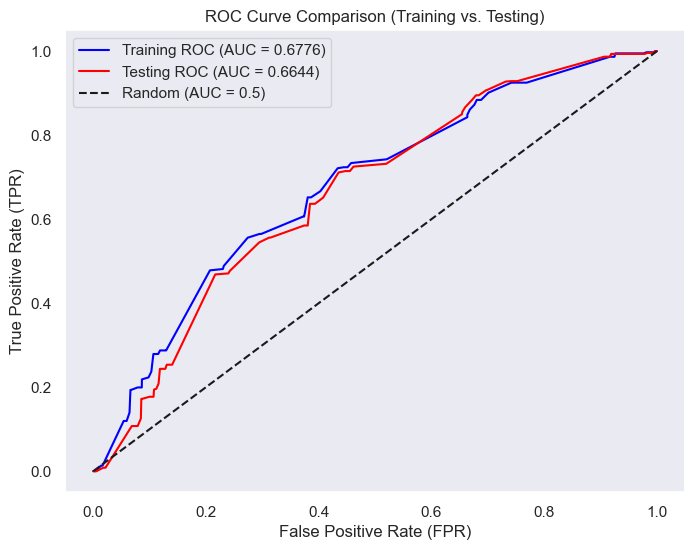

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

x_train_cbc = X_train
x_test_cbc = X_test
# Get probability predictions instead of binary labels
y_train_prob_cbc = logit_model_cbc.predict_proba(X_train_cbc)[:, 1]  # Probabilities for positive class
y_test_prob_cbc = logit_model_cbc.predict_proba(X_test_cbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob_cbc)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_cbc)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob_cbc)
auc_test = roc_auc_score(y_test, y_test_prob_cbc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid()
plt.show()

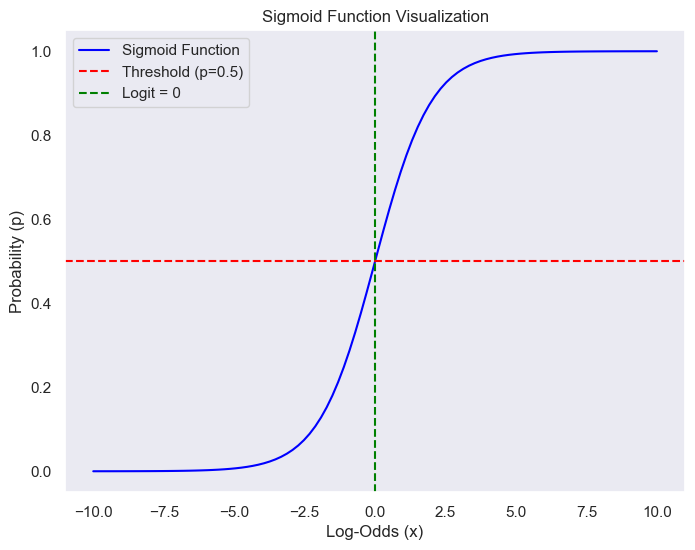

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Sigmoid Function", color="blue")
plt.axhline(y=0.5, color="red", linestyle="--", label="Threshold (p=0.5)")
plt.axvline(x=0, color="green", linestyle="--", label="Logit = 0")
plt.xlabel("Log-Odds (x)")
plt.ylabel("Probability (p)")
plt.title("Sigmoid Function Visualization")
plt.legend()
plt.grid()
plt.show()

## PCA

In [1647]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## XGboost

In [49]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE for oversampling
smote = SMOTE(random_state=29)
X_resampled, y_resampled = smote.fit_resample(X_CBC, target_binary)

# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced Class Distribution:", dict(zip(unique, counts)))

# Split the resampled dataset
X_train_cbc, X_test_cbc, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=29)


# Model Initialization and Training
xgb_model_cbc = xgb.XGBClassifier()
xgb_model_cbc.fit(X_train_cbc, y_train)

# Predictions on Training and Test Data
predictions_train_xgb = xgb_model_cbc.predict(X_train_cbc)  # Training predictions
predictions_test_xgb = xgb_model_cbc.predict(X_test_cbc)    # Testing predictions

# Accuracy Calculation
accuracy_train_xgb = accuracy_score(y_train, predictions_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, predictions_test_xgb)

# Print the results
print(f"Training Accuracy: {accuracy_train_xgb:.4f}")
print(f"Testing Accuracy: {accuracy_test_xgb:.4f}")

Balanced Class Distribution: {0: 6155, 1: 6155}
Training Accuracy: 0.7299
Testing Accuracy: 0.7206


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on Training and Test Data
predictions_train_xgb = xgb_model_cbc.predict(X_train_cbc)  # Training predictions
predictions_test_xgb = xgb_model_cbc.predict(X_test_cbc)    # Testing predictions

# Compute Confusion Matrix for Training Data
conf_matrix_train_xgb = confusion_matrix(y_train, predictions_train_xgb)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train_xgb.ravel()

# Compute Confusion Matrix for Testing Data
conf_matrix_test_xgb = confusion_matrix(y_test, predictions_test_xgb)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test_xgb.ravel()

# Training Metrics
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if TP_train + FP_train != 0 else 0
recall_train = TP_train / (TP_train + FN_train) if TP_train + FN_train != 0 else 0
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if precision_train + recall_train != 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if TN_train + FP_train != 0 else 0
fnr_train = FN_train / (FN_train + TP_train) if FN_train + TP_train != 0 else 0
fpr_train = FP_train / (FP_train + TN_train) if FP_train + TN_train != 0 else 0

# Testing Metrics
accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if TP_test + FP_test != 0 else 0
recall_test = TP_test / (TP_test + FN_test) if TP_test + FN_test != 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test != 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if TN_test + FP_test != 0 else 0
fnr_test = FN_test / (FN_test + TP_test) if FN_test + TP_test != 0 else 0
fpr_test = FP_test / (FP_test + TN_test) if FP_test + TN_test != 0 else 0

# Print Training Results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Training Specificity: {specificity_train:.4f}")
print(f"Training False Negative Rate (FNR): {fnr_train:.4f}")
print(f"Training False Positive Rate (FPR): {fpr_train:.4f}")

# Print Testing Results
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing False Negative Rate (FNR): {fnr_test:.4f}")
print(f"Testing False Positive Rate (FPR): {fpr_test:.4f}")

Training Accuracy: 0.7299
Training Precision: 0.7344
Training Recall: 0.7222
Training F1 Score: 0.7283
Training Specificity: 0.7376
Training False Negative Rate (FNR): 0.2778
Training False Positive Rate (FPR): 0.2624
Testing Accuracy: 0.7206
Testing Precision: 0.7143
Testing Recall: 0.7260
Testing F1 Score: 0.7201
Testing Specificity: 0.7152
Testing False Negative Rate (FNR): 0.2740
Testing False Positive Rate (FPR): 0.2848


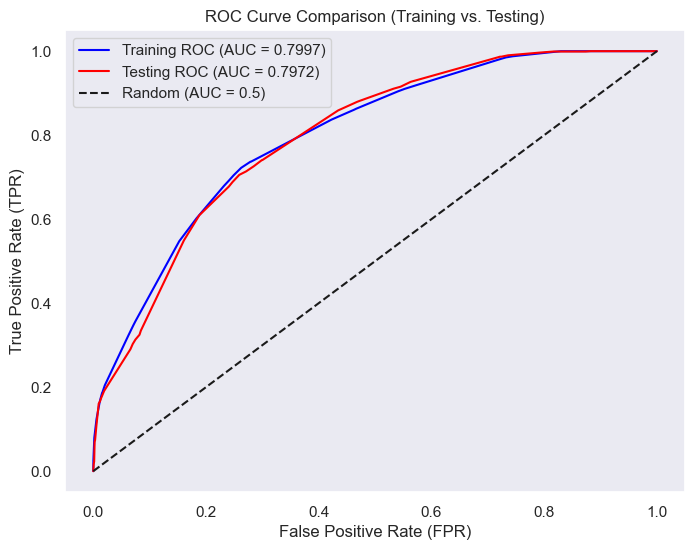

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob = xgb_model_cbc.predict_proba(X_train_cbc)[:, 1]  # Probabilities for positive class
y_test_prob = xgb_model_cbc.predict_proba(X_test_cbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid(False)
plt.show()

### Optimization of Xgboost

In [1467]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the DMatrix for XGBoost (used internally for computation)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define Parameters for Boosting Framework
params = {
    'objective': 'binary:logistic',  # For binary classification
    'learning_rate': 0.1,           # Step size for boosting
    'max_depth': 3,                 # Depth of each tree
    'eval_metric': 'logloss'        # Evaluation metric (log-loss for classification)
}

# Model Construction Using Boosting Framework
model = xgb.train(params, dtrain, num_boost_round=100)  # num_boost_round sets number of iterations
predictions = model.predict(dtest)

In [1468]:
# Train the XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate Predictions
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5832832230907997


In [1440]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [5, 7, 10],           
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.8, 1.0]
}

# XGBoost with GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=29), param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 150, 'subsample': 1.0}
Best Accuracy: 0.5857624429902835


## Random Forest Model 

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Model Initialization and Training
rf_model_cbc = RandomForestClassifier(n_estimators=100, random_state=29)
rf_model_cbc.fit(X_train_cbc, y_train)

# Predictions on Training and Test Data
predictions_train_rf = rf_model_cbc.predict(X_train_cbc)  # Training predictions
predictions_test_rf = rf_model_cbc.predict(X_test_cbc)    # Testing predictions

# Accuracy Calculation
accuracy_train_rf = accuracy_score(y_train, predictions_train_rf)
accuracy_test_rf = accuracy_score(y_test, predictions_test_rf)

# Print the results
print(f"Training Accuracy: {accuracy_train_rf:.4f}")
print(f"Testing Accuracy: {accuracy_test_rf:.4f}")

Training Accuracy: 0.7300
Testing Accuracy: 0.7206


In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on Training and Test Data
predictions_train_rf = rf_model_cbc.predict(X_train_cbc)  # Training predictions
predictions_test_rf = rf_model_cbc.predict(X_test_cbc)    # Testing predictions

# Compute Confusion Matrix for Training Data
conf_matrix_train_rf = confusion_matrix(y_train, predictions_train_rf)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train_rf.ravel()

# Compute Confusion Matrix for Testing Data
conf_matrix_test_rf = confusion_matrix(y_test, predictions_test_rf)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test_rf.ravel()

# Training Metrics
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if TP_train + FP_train != 0 else 0
recall_train = TP_train / (TP_train + FN_train) if TP_train + FN_train != 0 else 0
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if precision_train + recall_train != 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if TN_train + FP_train != 0 else 0
fnr_train = FN_train / (FN_train + TP_train) if FN_train + TP_train != 0 else 0
fpr_train = FP_train / (FP_train + TN_train) if FP_train + TN_train != 0 else 0

# Testing Metrics
accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if TP_test + FP_test != 0 else 0
recall_test = TP_test / (TP_test + FN_test) if TP_test + FN_test != 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test != 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if TN_test + FP_test != 0 else 0
fnr_test = FN_test / (FN_test + TP_test) if FN_test + TP_test != 0 else 0
fpr_test = FP_test / (FP_test + TN_test) if FP_test + TN_test != 0 else 0

# Print Training Results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Training Specificity: {specificity_train:.4f}")
print(f"Training False Negative Rate (FNR): {fnr_train:.4f}")
print(f"Training False Positive Rate (FPR): {fpr_train:.4f}")

# Print Testing Results
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing False Negative Rate (FNR): {fnr_test:.4f}")
print(f"Testing False Positive Rate (FPR): {fpr_test:.4f}")

Training Accuracy: 0.7300
Training Precision: 0.7346
Training Recall: 0.7222
Training F1 Score: 0.7284
Training Specificity: 0.7378
Training False Negative Rate (FNR): 0.2778
Training False Positive Rate (FPR): 0.2622
Testing Accuracy: 0.7206
Testing Precision: 0.7143
Testing Recall: 0.7260
Testing F1 Score: 0.7201
Testing Specificity: 0.7152
Testing False Negative Rate (FNR): 0.2740
Testing False Positive Rate (FPR): 0.2848


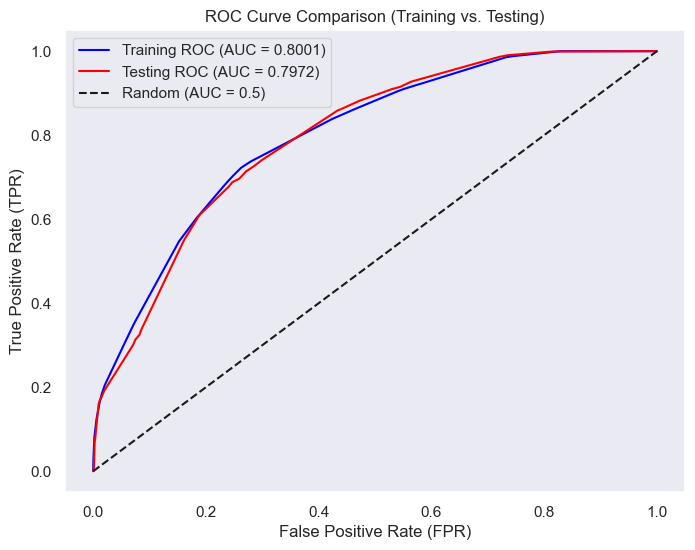

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob = rf_model_cbc.predict_proba(X_train_cbc)[:, 1]  # Probabilities for positive class
y_test_prob = rf_model_cbc.predict_proba(X_test_cbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid()
plt.show()

## Suport Vector Machine

In [164]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Model Initialization and Training
svm_model_cbc = SVC(kernel='rbf', probability= True)  # Using RBF kernel for non-linear classification
svm_model_cbc.fit(X_train_cbc, y_train)

# Predictions on Training and Test Data
predictions_train_svm = svm_model_cbc.predict(X_train_cbc)  # Training predictions
predictions_test_svm = svm_model_cbc.predict(X_test_cbc)    # Testing predictions

# Accuracy Calculation
accuracy_train_svm = accuracy_score(y_train, predictions_train_svm)
accuracy_test_svm = accuracy_score(y_test, predictions_test_svm)

# Print the results
print(f"Training Accuracy: {accuracy_train_svm:.4f}")
print(f"Testing Accuracy: {accuracy_test_svm:.4f}")

Training Accuracy: 0.7292
Testing Accuracy: 0.7197


In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on Training and Test Data
predictions_train_svm = svm_model_cbc.predict(X_train_cbc)  # Training predictions
predictions_test_svm = svm_model_cbc.predict(X_test_cbc)    # Testing predictions

# Compute Confusion Matrix for Training Data
conf_matrix_train_svm = confusion_matrix(y_train, predictions_train_svm)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train_svm.ravel()

# Compute Confusion Matrix for Testing Data
conf_matrix_test_svm = confusion_matrix(y_test, predictions_test_svm)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test_svm.ravel()

# Training Metrics
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if TP_train + FP_train != 0 else 0
recall_train = TP_train / (TP_train + FN_train) if TP_train + FN_train != 0 else 0
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train) if precision_train + recall_train != 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if TN_train + FP_train != 0 else 0
fnr_train = FN_train / (FN_train + TP_train) if FN_train + TP_train != 0 else 0
fpr_train = FP_train / (FP_train + TN_train) if FP_train + TN_train != 0 else 0

# Testing Metrics
accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if TP_test + FP_test != 0 else 0
recall_test = TP_test / (TP_test + FN_test) if TP_test + FN_test != 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if precision_test + recall_test != 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if TN_test + FP_test != 0 else 0
fnr_test = FN_test / (FN_test + TP_test) if FN_test + TP_test != 0 else 0
fpr_test = FP_test / (FP_test + TN_test) if FP_test + TN_test != 0 else 0

# Print Training Results
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1 Score: {f1_train:.4f}")
print(f"Training Specificity: {specificity_train:.4f}")
print(f"Training False Negative Rate (FNR): {fnr_train:.4f}")
print(f"Training False Positive Rate (FPR): {fpr_train:.4f}")

# Print Testing Results
print(f"Testing Accuracy: {accuracy_test:.4f}")
print(f"Testing Precision: {precision_test:.4f}")
print(f"Testing Recall: {recall_test:.4f}")
print(f"Testing F1 Score: {f1_test:.4f}")
print(f"Testing Specificity: {specificity_test:.4f}")
print(f"Testing False Negative Rate (FNR): {fnr_test:.4f}")
print(f"Testing False Positive Rate (FPR): {fpr_test:.4f}")

Training Accuracy: 0.7292
Training Precision: 0.7334
Training Recall: 0.7222
Training F1 Score: 0.7278
Training Specificity: 0.7362
Training False Negative Rate (FNR): 0.2778
Training False Positive Rate (FPR): 0.2638
Testing Accuracy: 0.7197
Testing Precision: 0.7131
Testing Recall: 0.7260
Testing F1 Score: 0.7195
Testing Specificity: 0.7136
Testing False Negative Rate (FNR): 0.2740
Testing False Positive Rate (FPR): 0.2864


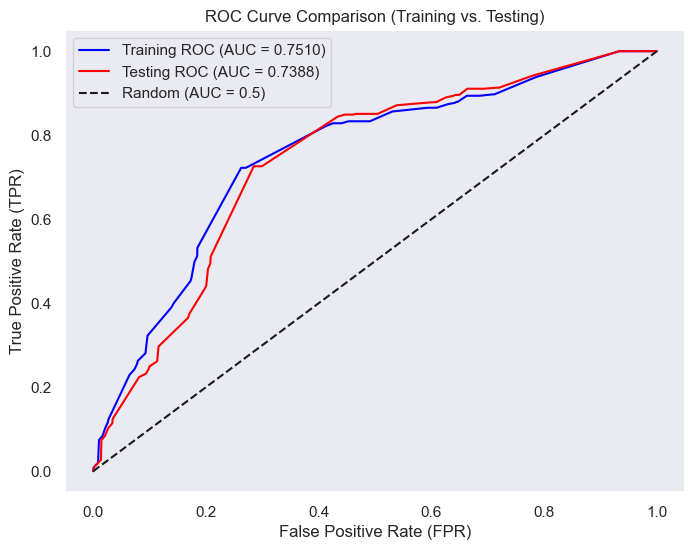

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob = svm_model_cbc.predict_proba(X_train_cbc)[:, 1]  # Probabilities for positive class
y_test_prob = svm_model_cbc.predict_proba(X_test_cbc)[:, 1]    # Same for test set

# Compute ROC curve points for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC scores
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.4f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")  # Baseline for no-skill classifier
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Training vs. Testing)")
plt.legend()
plt.grid()
plt.show()

In [167]:
models = {'Logit Model': accuracy_train_logit, 'XGBoost': accuracy_train_xgb, 'Random Forest': accuracy_train_rf, 'SVM': accuracy_train_svm}
for name, score in models.items():
    print(f"{name} Accuracy: {score}")

Logit Model Accuracy: 0.6328188464662876
XGBoost Accuracy: 0.7298943948009748
Random Forest Accuracy: 0.7299959382615759
SVM Accuracy: 0.7291835905767668


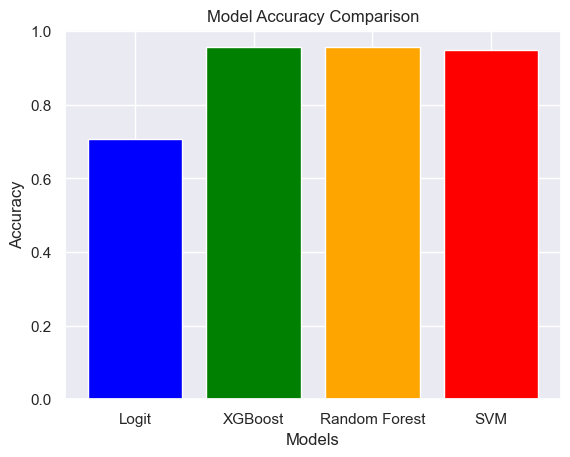

In [1655]:
import matplotlib.pyplot as plt

model_names = ['Logit', 'XGBoost', 'Random Forest', 'SVM']
model_scores = [accuracy_train_logit, accuracy_train_xgb, accuracy_train_rf, accuracy_train_svm]

plt.bar(model_names, model_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Comparison of CSBC-ML and CBC-ML

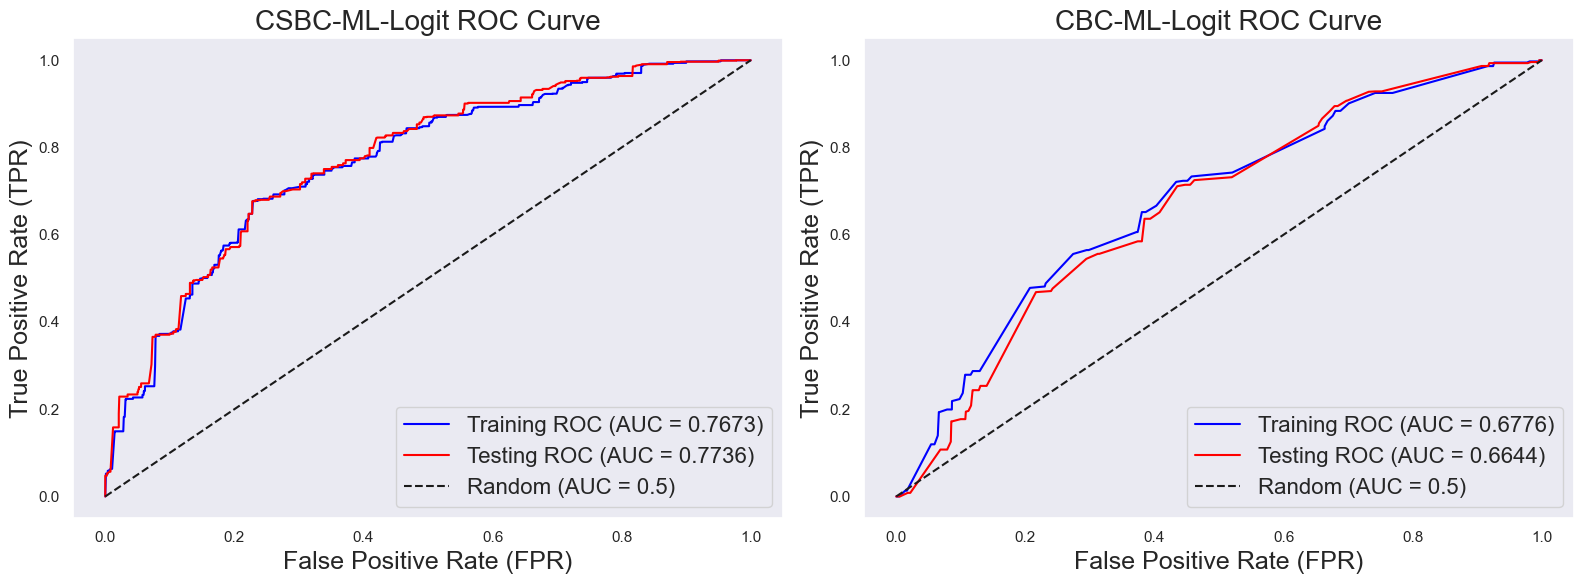

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels
y_train_prob_csbc = logit_model_csbc.predict_proba(X_train_csbc)[:, 1]  # Probabilities for positive class
y_test_prob_csbc = logit_model_csbc.predict_proba(X_test_csbc)[:, 1]    # Same for test set

# Get probability predictions instead of binary labels
y_train_prob_cbc = logit_model_cbc.predict_proba(X_train_cbc)[:, 1]  # Probabilities for positive class
y_test_prob_cbc = logit_model_cbc.predict_proba(X_test_cbc)[:, 1]    # Same for test set

# Compute ROC curve points
fpr_train_csbc, tpr_train_csbc, _ = roc_curve(y_train, y_train_prob_csbc)
fpr_test_csbc, tpr_test_csbc, _ = roc_curve(y_test, y_test_prob_csbc)

fpr_train_cbc, tpr_train_cbc, _ = roc_curve(y_train, y_train_prob_cbc)
fpr_test_cbc, tpr_test_cbc, _ = roc_curve(y_test, y_test_prob_cbc)

# Compute AUC scores
auc_train_csbc = roc_auc_score(y_train, y_train_prob_csbc)
auc_test_csbc = roc_auc_score(y_test, y_test_prob_csbc)

auc_train_cbc = roc_auc_score(y_train, y_train_prob_cbc)
auc_test_cbc = roc_auc_score(y_test, y_test_prob_cbc)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CSBC-ML-Logit ROC Curve
axes[0].plot(fpr_train_csbc, tpr_train_csbc, label=f'Training ROC (AUC = {auc_train_csbc:.4f})', color='blue')
axes[0].plot(fpr_test_csbc, tpr_test_csbc, label=f'Testing ROC (AUC = {auc_test_csbc:.4f})', color='red')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate (FPR)", fontsize =18)
axes[0].set_ylabel("True Positive Rate (TPR)", fontsize =18)
axes[0].set_title("CSBC-ML-Logit ROC Curve", fontsize =20)
axes[0].legend(fontsize =16)
axes[0].grid()

# CBC-ML-Logit ROC Curve
axes[1].plot(fpr_train_cbc, tpr_train_cbc, label=f'Training ROC (AUC = {auc_train_cbc:.4f})', color='blue')
axes[1].plot(fpr_test_cbc, tpr_test_cbc, label=f'Testing ROC (AUC = {auc_test_cbc:.4f})', color='red')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate (FPR)", fontsize =18)
axes[1].set_ylabel("True Positive Rate (TPR)", fontsize =18)
axes[1].set_title("CBC-ML-Logit ROC Curve", fontsize =20)
axes[1].legend(fontsize =16, loc = 'lower right')
axes[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
output_path = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\combined_roc_logit.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')  # High resolution for publications

# Display the plot
plt.show()

Successfully Saved to C:\Road to PhD\Thesis Latex\csbc_cbc_xgb.png


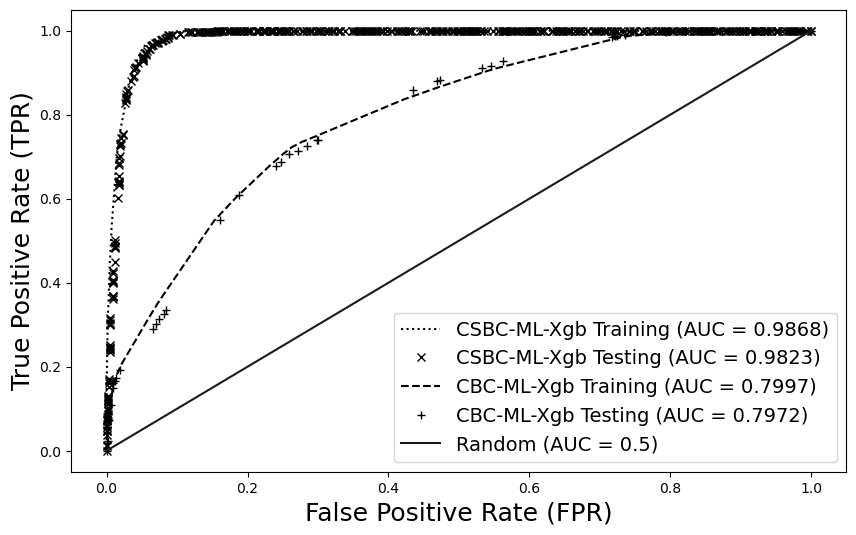

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels for both models
y_train_prob_csbc = xgb_model_csbc.predict_proba(X_train_csbc)[:, 1]  # CSBC-ML-Xgb
y_test_prob_csbc = xgb_model_csbc.predict_proba(X_test_csbc)[:, 1]

y_train_prob_cbc = xgb_model_cbc.predict_proba(X_train_cbc)[:, 1]  # CBC-ML-Xgb
y_test_prob_cbc = xgb_model_cbc.predict_proba(X_test_cbc)[:, 1]

# Compute ROC curve points for both models
fpr_train_csbc, tpr_train_csbc, _ = roc_curve(y_train, y_train_prob_csbc)
fpr_test_csbc, tpr_test_csbc, _ = roc_curve(y_test, y_test_prob_csbc)

fpr_train_cbc, tpr_train_cbc, _ = roc_curve(y_train, y_train_prob_cbc)
fpr_test_cbc, tpr_test_cbc, _ = roc_curve(y_test, y_test_prob_cbc)

# Compute AUC scores
auc_train_csbc = roc_auc_score(y_train, y_train_prob_csbc)
auc_test_csbc = roc_auc_score(y_test, y_test_prob_csbc)

auc_train_cbc = roc_auc_score(y_train, y_train_prob_cbc)
auc_test_cbc = roc_auc_score(y_test, y_test_prob_cbc)

# Plot ROC Curve comparison
plt.figure(figsize=(10, 6))

plt.style.use('default')
# CSBC-ML-Xgb ROC Curves
plt.plot(fpr_train_csbc, tpr_train_csbc, label=f'CSBC-ML-Xgb Training (AUC = {auc_train_csbc:.4f})', color='black', linestyle='dotted')
plt.plot(fpr_test_csbc, tpr_test_csbc, 'x', label=f'CSBC-ML-Xgb Testing (AUC = {auc_test_csbc:.4f})', color='black')

# CBC-ML-Xgb ROC Curves
plt.plot(fpr_train_cbc, tpr_train_cbc, label=f'CBC-ML-Xgb Training (AUC = {auc_train_cbc:.4f})', color='black', linestyle='--')
plt.plot(fpr_test_cbc, tpr_test_cbc, '+', label=f'CBC-ML-Xgb Testing (AUC = {auc_test_cbc:.4f})', color='black')

# Baseline (Random classifier)
plt.plot([0, 1], [0, 1], 'k-', label="Random (AUC = 0.5)")

#output file 
output_pathx = r'C:\Road to PhD\Thesis Latex\csbc_cbc_xgb.png'
# Labels and legend
plt.xlabel("False Positive Rate (FPR)", fontsize = 18)
plt.ylabel("True Positive Rate (TPR)", fontsize = 18)
#plt.title("ROC Curve Comparison: CSBC-ML-Xgb vs CBC-ML-Xgb")
plt.legend(fontsize = 14)
plt.grid(False)
plt.savefig(output_pathx)
print(f'Successfully Saved to {output_pathx}')
plt.show()

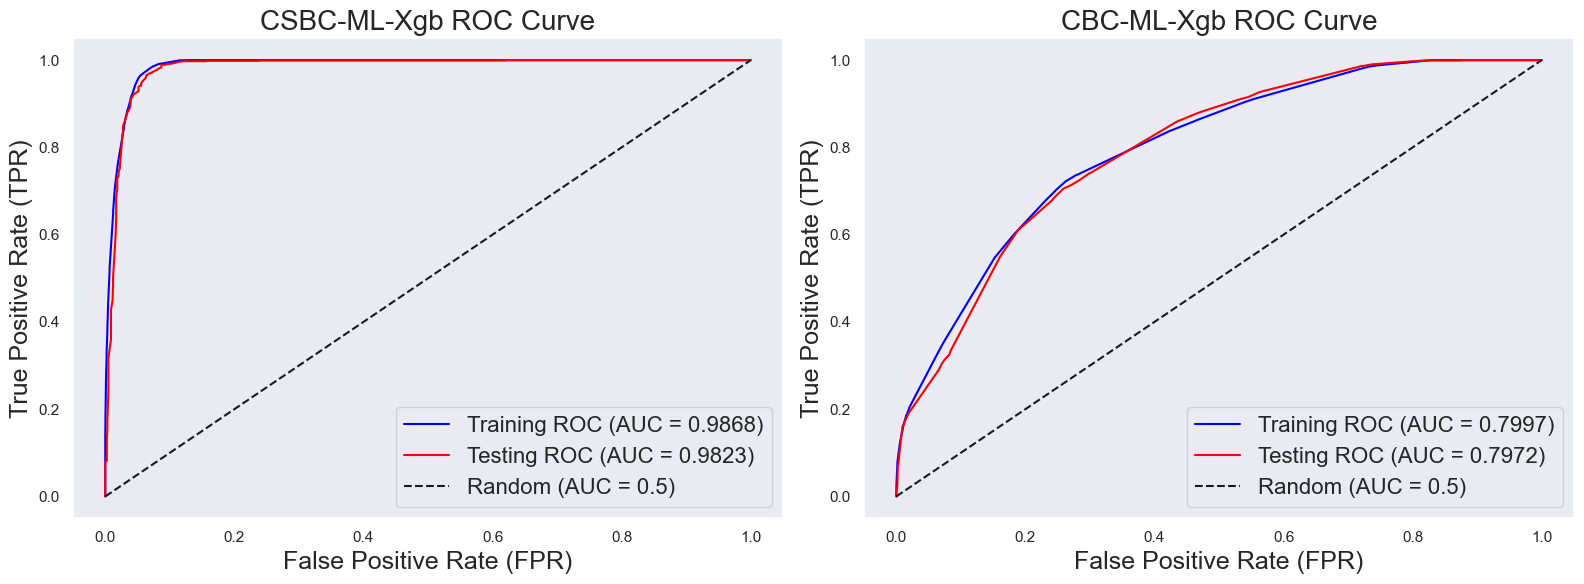

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels for both models
y_train_prob_csbc = xgb_model_csbc.predict_proba(X_train_csbc)[:, 1]  # CSBC-ML-Xgb
y_test_prob_csbc = xgb_model_csbc.predict_proba(X_test_csbc)[:, 1]

y_train_prob_cbc = xgb_model_cbc.predict_proba(X_train_cbc)[:, 1]  # CBC-ML-Xgb
y_test_prob_cbc = xgb_model_cbc.predict_proba(X_test_cbc)[:, 1]

# Compute ROC curve points for both models
fpr_train_csbc, tpr_train_csbc, _ = roc_curve(y_train, y_train_prob_csbc)
fpr_test_csbc, tpr_test_csbc, _ = roc_curve(y_test, y_test_prob_csbc)

fpr_train_cbc, tpr_train_cbc, _ = roc_curve(y_train, y_train_prob_cbc)
fpr_test_cbc, tpr_test_cbc, _ = roc_curve(y_test, y_test_prob_cbc)

# Compute AUC scores
auc_train_csbc = roc_auc_score(y_train, y_train_prob_csbc)
auc_test_csbc = roc_auc_score(y_test, y_test_prob_csbc)

auc_train_cbc = roc_auc_score(y_train, y_train_prob_cbc)
auc_test_cbc = roc_auc_score(y_test, y_test_prob_cbc)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CSBC-ML-Xgb ROC Curve
axes[0].plot(fpr_train_csbc, tpr_train_csbc, label=f'Training ROC (AUC = {auc_train_csbc:.4f})', color='blue')
axes[0].plot(fpr_test_csbc, tpr_test_csbc, label=f'Testing ROC (AUC = {auc_test_csbc:.4f})', color='red')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate (FPR)", fontsize = 18)
axes[0].set_ylabel("True Positive Rate (TPR)", fontsize = 18)
axes[0].set_title("CSBC-ML-Xgb ROC Curve", fontsize = 20)
axes[0].legend(fontsize =16)
axes[0].grid()

# CBC-ML-Xgb ROC Curve
axes[1].plot(fpr_train_cbc, tpr_train_cbc, label=f'Training ROC (AUC = {auc_train_cbc:.4f})', color='blue')
axes[1].plot(fpr_test_cbc, tpr_test_cbc, label=f'Testing ROC (AUC = {auc_test_cbc:.4f})', color='red')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate (FPR)", fontsize = 18)
axes[1].set_ylabel("True Positive Rate (TPR)", fontsize = 18)
axes[1].set_title("CBC-ML-Xgb ROC Curve", fontsize = 20)
axes[1].legend(fontsize = 16, loc ='lower right')
axes[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
output_path = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\combined_roc_xgb.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')  # High resolution for publications

# Display the plot
plt.show()

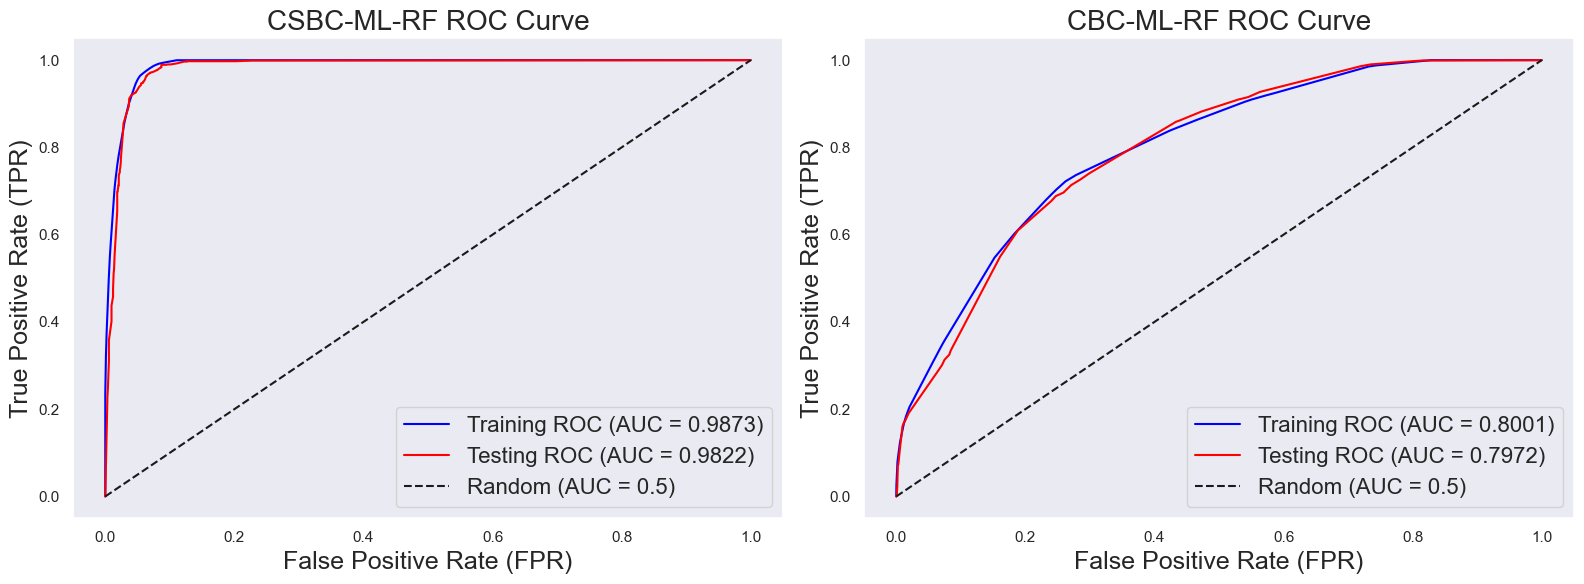

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels for both models
y_train_prob_csbc = rf_model_csbc.predict_proba(X_train_csbc)[:, 1]  # CSBC-ML-Xgb
y_test_prob_csbc = rf_model_csbc.predict_proba(X_test_csbc)[:, 1]

y_train_prob_cbc = rf_model_cbc.predict_proba(X_train_cbc)[:, 1]  # CBC-ML-Xgb
y_test_prob_cbc = rf_model_cbc.predict_proba(X_test_cbc)[:, 1]

# Compute ROC curve points for both models
fpr_train_csbc, tpr_train_csbc, _ = roc_curve(y_train, y_train_prob_csbc)
fpr_test_csbc, tpr_test_csbc, _ = roc_curve(y_test, y_test_prob_csbc)

fpr_train_cbc, tpr_train_cbc, _ = roc_curve(y_train, y_train_prob_cbc)
fpr_test_cbc, tpr_test_cbc, _ = roc_curve(y_test, y_test_prob_cbc)

# Compute AUC scores
auc_train_csbc = roc_auc_score(y_train, y_train_prob_csbc)
auc_test_csbc = roc_auc_score(y_test, y_test_prob_csbc)

auc_train_cbc = roc_auc_score(y_train, y_train_prob_cbc)
auc_test_cbc = roc_auc_score(y_test, y_test_prob_cbc)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CSBC-ML-Xgb ROC Curve
axes[0].plot(fpr_train_csbc, tpr_train_csbc, label=f'Training ROC (AUC = {auc_train_csbc:.4f})', color='blue')
axes[0].plot(fpr_test_csbc, tpr_test_csbc, label=f'Testing ROC (AUC = {auc_test_csbc:.4f})', color='red')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate (FPR)", fontsize = 18)
axes[0].set_ylabel("True Positive Rate (TPR)", fontsize = 18)
axes[0].set_title("CSBC-ML-RF ROC Curve", fontsize = 20)
axes[0].legend(fontsize = 16)
axes[0].grid()

# CBC-ML-Xgb ROC Curve
axes[1].plot(fpr_train_cbc, tpr_train_cbc, label=f'Training ROC (AUC = {auc_train_cbc:.4f})', color='blue')
axes[1].plot(fpr_test_cbc, tpr_test_cbc, label=f'Testing ROC (AUC = {auc_test_cbc:.4f})', color='red')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate (FPR)", fontsize = 18)
axes[1].set_ylabel("True Positive Rate (TPR)", fontsize = 18)
axes[1].set_title("CBC-ML-RF ROC Curve", fontsize = 20)
axes[1].legend(fontsize = 16, loc = 'lower right')
axes[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
output_path = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\combined_roc_rf.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')  # High resolution for publications

# Display the plot
plt.show()

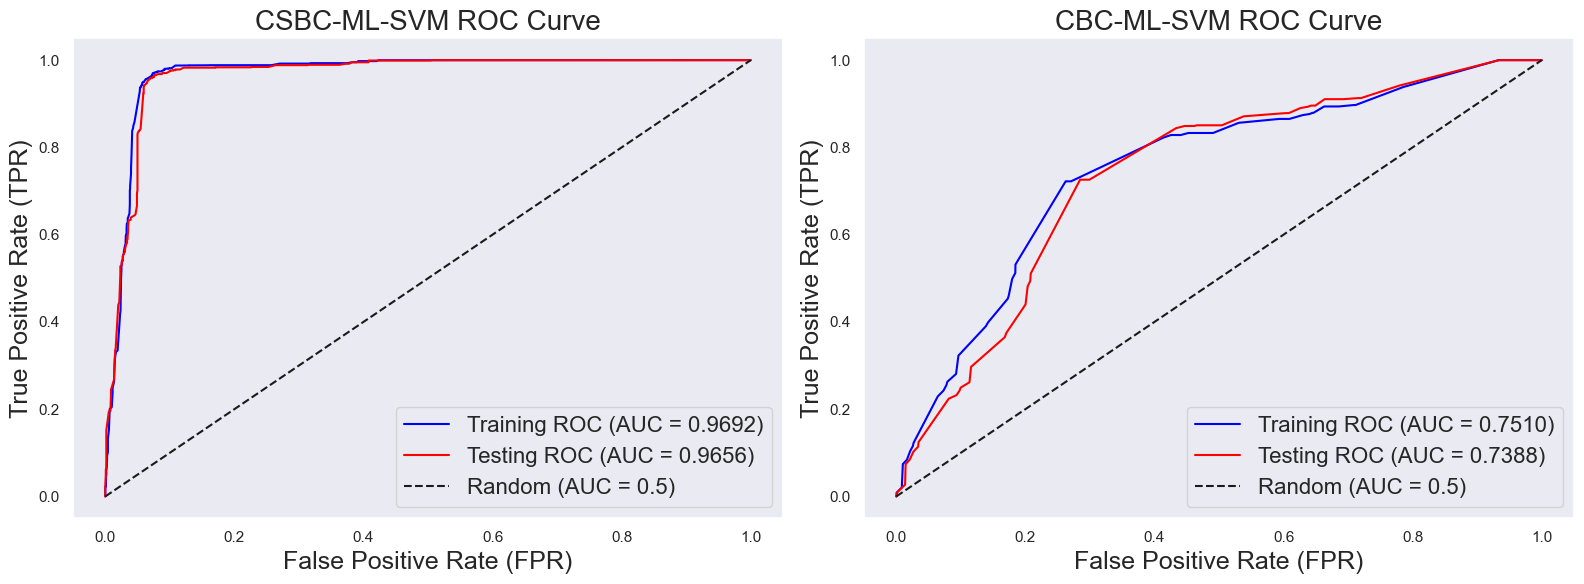

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions instead of binary labels for both models
y_train_prob_csbc = svm_model_csbc.predict_proba(X_train_csbc)[:, 1]  # CSBC-ML-Xgb
y_test_prob_csbc = svm_model_csbc.predict_proba(X_test_csbc)[:, 1]

y_train_prob_cbc = svm_model_cbc.predict_proba(X_train_cbc)[:, 1]  # CBC-ML-Xgb
y_test_prob_cbc = svm_model_cbc.predict_proba(X_test_cbc)[:, 1]

# Compute ROC curve points for both models
fpr_train_csbc, tpr_train_csbc, _ = roc_curve(y_train, y_train_prob_csbc)
fpr_test_csbc, tpr_test_csbc, _ = roc_curve(y_test, y_test_prob_csbc)

fpr_train_cbc, tpr_train_cbc, _ = roc_curve(y_train, y_train_prob_cbc)
fpr_test_cbc, tpr_test_cbc, _ = roc_curve(y_test, y_test_prob_cbc)

# Compute AUC scores
auc_train_csbc = roc_auc_score(y_train, y_train_prob_csbc)
auc_test_csbc = roc_auc_score(y_test, y_test_prob_csbc)

auc_train_cbc = roc_auc_score(y_train, y_train_prob_cbc)
auc_test_cbc = roc_auc_score(y_test, y_test_prob_cbc)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# CSBC-ML-Xgb ROC Curve
axes[0].plot(fpr_train_csbc, tpr_train_csbc, label=f'Training ROC (AUC = {auc_train_csbc:.4f})', color='blue')
axes[0].plot(fpr_test_csbc, tpr_test_csbc, label=f'Testing ROC (AUC = {auc_test_csbc:.4f})', color='red')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate (FPR)", fontsize = 18)
axes[0].set_ylabel("True Positive Rate (TPR)", fontsize = 18)
axes[0].set_title("CSBC-ML-SVM ROC Curve", fontsize = 20)
axes[0].legend(fontsize = 16)
axes[0].grid()

# CBC-ML-Xgb ROC Curve
axes[1].plot(fpr_train_cbc, tpr_train_cbc, label=f'Training ROC (AUC = {auc_train_cbc:.4f})', color='blue')
axes[1].plot(fpr_test_cbc, tpr_test_cbc, label=f'Testing ROC (AUC = {auc_test_cbc:.4f})', color='red')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate (FPR)", fontsize = 18)
axes[1].set_ylabel("True Positive Rate (TPR)", fontsize = 18)
axes[1].set_title("CBC-ML-SVM ROC Curve", fontsize = 20)
axes[1].legend(fontsize = 16)
axes[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure
output_path = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\combined_roc_svm.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')  # High resolution for publications

# Display the plot
plt.show()

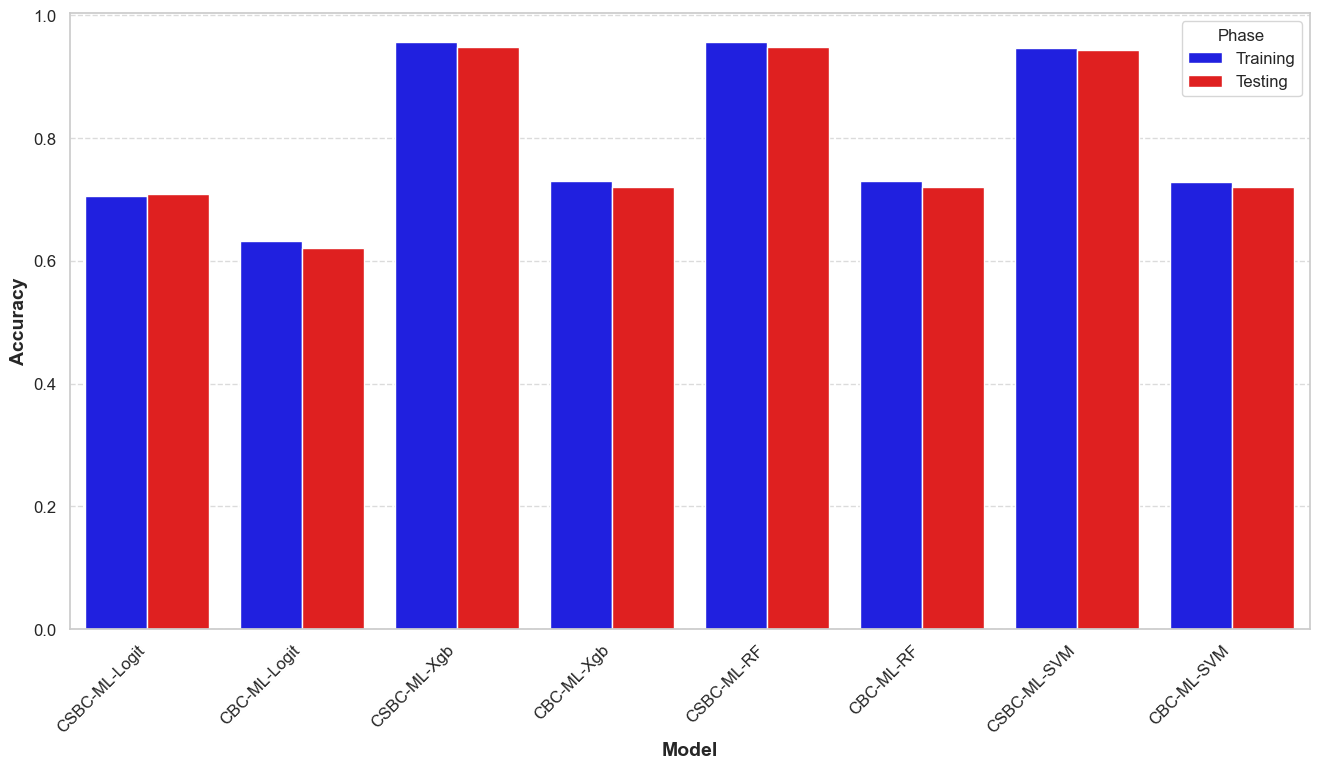

In [1865]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = [
    "CSBC-ML-Logit", "CBC-ML-Logit",
    "CSBC-ML-Xgb", "CBC-ML-Xgb",
    "CSBC-ML-RF", "CBC-ML-RF",
    "CSBC-ML-SVM", "CBC-ML-SVM"
]

# Training Metrics
train_accuracy = [0.7061, 0.6328, 0.9560, 0.7299, 0.9562, 0.7300, 0.9476, 0.7292]
train_precision = [0.6985, 0.6290, 0.9347, 0.7344, 0.9348, 0.7346, 0.9283, 0.7334]
train_recall = [0.7279, 0.6519, 0.9808, 0.7222, 0.9812, 0.7222, 0.9704, 0.7222]
train_f1 = [0.7129, 0.6403, 0.9572, 0.7283, 0.9574, 0.7284, 0.9489, 0.7278]

# Testing Metrics
test_accuracy = [0.7092, 0.6214, 0.9488, 0.7206, 0.9484, 0.7206, 0.9435, 0.7197]
test_precision = [0.6976, 0.6134, 0.9240, 0.7143, 0.9233, 0.7143, 0.9239, 0.7131]
test_recall = [0.7285, 0.6366, 0.9770, 0.7260, 0.9770, 0.7260, 0.9655, 0.7260]
test_f1 = [0.7127, 0.6248, 0.9498, 0.7201, 0.9494, 0.7201, 0.9442, 0.7195]

# Convert to DataFrame for better handling
df = pd.DataFrame({
    "Model": models * 2,
    "Phase": ["Training"] * 8 + ["Testing"] * 8,
    "Accuracy": train_accuracy + test_accuracy,
    "Precision": train_precision + test_precision,
    "Recall": train_recall + test_recall,
    "F1 Score": train_f1 + test_f1
})

# Set figure aesthetics using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Plot grouped bar chart for accuracy comparison
ax = sns.barplot(x="Model", y="Accuracy", hue="Phase", data=df, palette=["blue", "red"])

# Formatting for journal-quality visuals
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy", fontsize=14, fontweight="bold")
#plt.title("Comparison of Model Training & Testing Accuracy", fontsize=16, fontweight="bold")
plt.legend(title="Phase", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save high-resolution figure for publication
output_path = r"D:\Road to PhD\Presentation (Progress Report)\Figures\model_comparison.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')

# Show plot
plt.show()

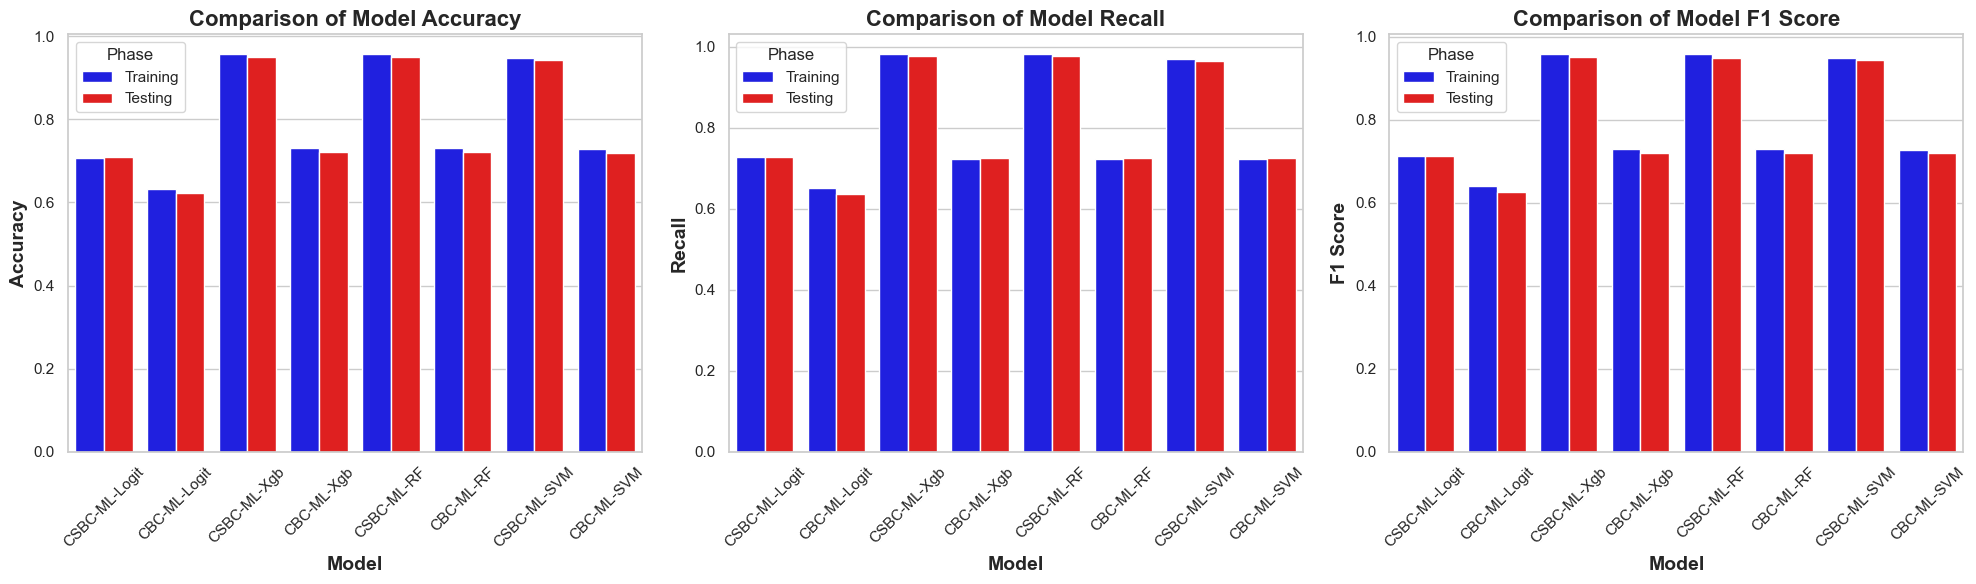

In [1866]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = [
    "CSBC-ML-Logit", "CBC-ML-Logit",
    "CSBC-ML-Xgb", "CBC-ML-Xgb",
    "CSBC-ML-RF", "CBC-ML-RF",
    "CSBC-ML-SVM", "CBC-ML-SVM"
]

# Training Metrics
train_accuracy = [0.7061, 0.6328, 0.9560, 0.7299, 0.9562, 0.7300, 0.9476, 0.7292]
train_precision = [0.6985, 0.6290, 0.9347, 0.7344, 0.9348, 0.7346, 0.9283, 0.7334]
train_recall = [0.7279, 0.6519, 0.9808, 0.7222, 0.9812, 0.7222, 0.9704, 0.7222]
train_f1 = [0.7129, 0.6403, 0.9572, 0.7283, 0.9574, 0.7284, 0.9489, 0.7278]

# Testing Metrics
test_accuracy = [0.7092, 0.6214, 0.9488, 0.7206, 0.9484, 0.7206, 0.9435, 0.7197]
test_precision = [0.6976, 0.6134, 0.9240, 0.7143, 0.9233, 0.7143, 0.9239, 0.7131]
test_recall = [0.7285, 0.6366, 0.9770, 0.7260, 0.9770, 0.7260, 0.9655, 0.7260]
test_f1 = [0.7127, 0.6248, 0.9498, 0.7201, 0.9494, 0.7201, 0.9442, 0.7195]

# Convert to DataFrame
df_accuracy = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "Accuracy": train_accuracy + test_accuracy})
df_recall = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "Recall": train_recall + test_recall})
df_f1 = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "F1 Score": train_f1 + test_f1})

# Set figure aesthetics using Seaborn
sns.set_style("whitegrid")

# Create subplots for Accuracy, Recall, and F1 Score
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot Accuracy Comparison
sns.barplot(x="Model", y="Accuracy", hue="Phase", data=df_accuracy, palette=["blue", "red"], ax=axes[0])
axes[0].set_title("Comparison of Model Accuracy", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Model", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Accuracy", fontsize=14, fontweight="bold")
axes[0].tick_params(axis='x', rotation=45)

# Plot Recall Comparison
sns.barplot(x="Model", y="Recall", hue="Phase", data=df_recall, palette=["blue", "red"], ax=axes[1])
axes[1].set_title("Comparison of Model Recall", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Model", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Recall", fontsize=14, fontweight="bold")
axes[1].tick_params(axis='x', rotation=45)

# Plot F1 Score Comparison
sns.barplot(x="Model", y="F1 Score", hue="Phase", data=df_f1, palette=["blue", "red"], ax=axes[2])
axes[2].set_title("Comparison of Model F1 Score", fontsize=16, fontweight="bold")
axes[2].set_xlabel("Model", fontsize=14, fontweight="bold")
axes[2].set_ylabel("F1 Score", fontsize=14, fontweight="bold")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Save high-resolution figure for publication
output_path = r"D:\Road to PhD\Presentation (Progress Report)\Figures\model_comparison_all.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')

# Show plot
plt.show()

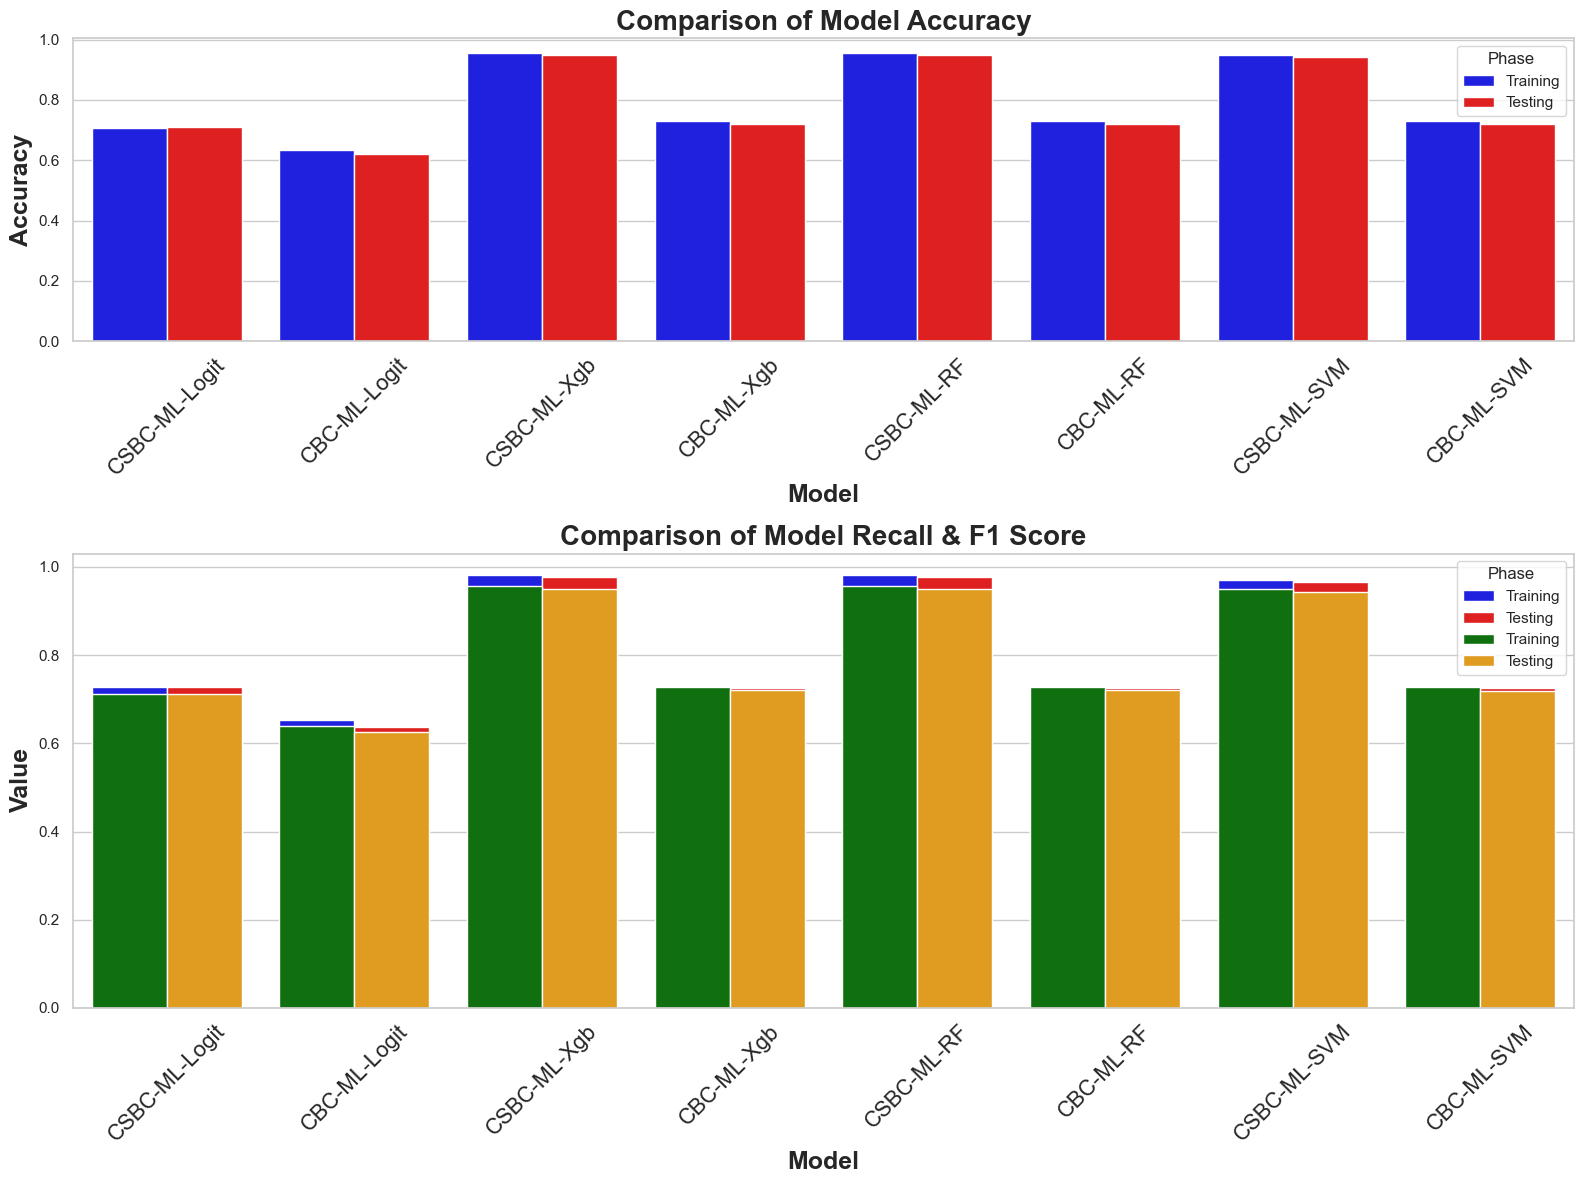

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = [
    "CSBC-ML-Logit", "CBC-ML-Logit",
    "CSBC-ML-Xgb", "CBC-ML-Xgb",
    "CSBC-ML-RF", "CBC-ML-RF",
    "CSBC-ML-SVM", "CBC-ML-SVM"
]

# Training Metrics
train_accuracy = [0.7061, 0.6328, 0.9560, 0.7299, 0.9562, 0.7300, 0.9476, 0.7292]
train_recall = [0.7279, 0.6519, 0.9808, 0.7222, 0.9812, 0.7222, 0.9704, 0.7222]
train_f1 = [0.7129, 0.6403, 0.9572, 0.7283, 0.9574, 0.7284, 0.9489, 0.7278]

# Testing Metrics
test_accuracy = [0.7092, 0.6214, 0.9488, 0.7206, 0.9484, 0.7206, 0.9435, 0.7197]
test_recall = [0.7285, 0.6366, 0.9770, 0.7260, 0.9770, 0.7260, 0.9655, 0.7260]
test_f1 = [0.7127, 0.6248, 0.9498, 0.7201, 0.9494, 0.7201, 0.9442, 0.7195]

# Convert to DataFrame
df_accuracy = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "Accuracy": train_accuracy + test_accuracy})
df_recall = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "Recall": train_recall + test_recall})
df_f1 = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "F1 Score": train_f1 + test_f1})

# Set figure aesthetics using Seaborn
sns.set_style("whitegrid")

# Create 2×1 collage: Two plots on top, one below
fig, axes = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1.5]})

# Top-left: Accuracy Comparison
sns.barplot(x="Model", y="Accuracy", hue="Phase", data=df_accuracy, palette=["blue", "red"], ax=axes[0])
axes[0].set_title("Comparison of Model Accuracy", fontsize=20, fontweight="bold")
axes[0].set_xlabel("Model", fontsize=18, fontweight="bold")
axes[0].set_ylabel("Accuracy", fontsize=18, fontweight="bold")
axes[0].tick_params(axis='x', rotation=45, labelsize = 16)


# Bottom: Combined Recall & F1 Score Comparison
df_combined = pd.concat([df_recall.assign(Metric="Recall"), df_f1.assign(Metric="F1 Score")])
sns.barplot(x="Model", y="Recall", hue="Phase", data=df_combined[df_combined["Metric"] == "Recall"], palette=["blue", "red"], ax=axes[1])
sns.barplot(x="Model", y="F1 Score", hue="Phase", data=df_combined[df_combined["Metric"] == "F1 Score"], palette=["green", "orange"], ax=axes[1])

axes[1].set_title("Comparison of Model Recall & F1 Score", fontsize=20, fontweight="bold")
axes[1].set_xlabel("Model", fontsize=18, fontweight="bold")
axes[1].set_ylabel("Value", fontsize=18, fontweight="bold")
axes[1].tick_params(axis='x', rotation=45, labelsize = 16)

# Adjust layout for better spacing
plt.tight_layout()

# Save high-resolution figure for publication
output_path = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\model_comparison_collage.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')

# Show plot
plt.show()

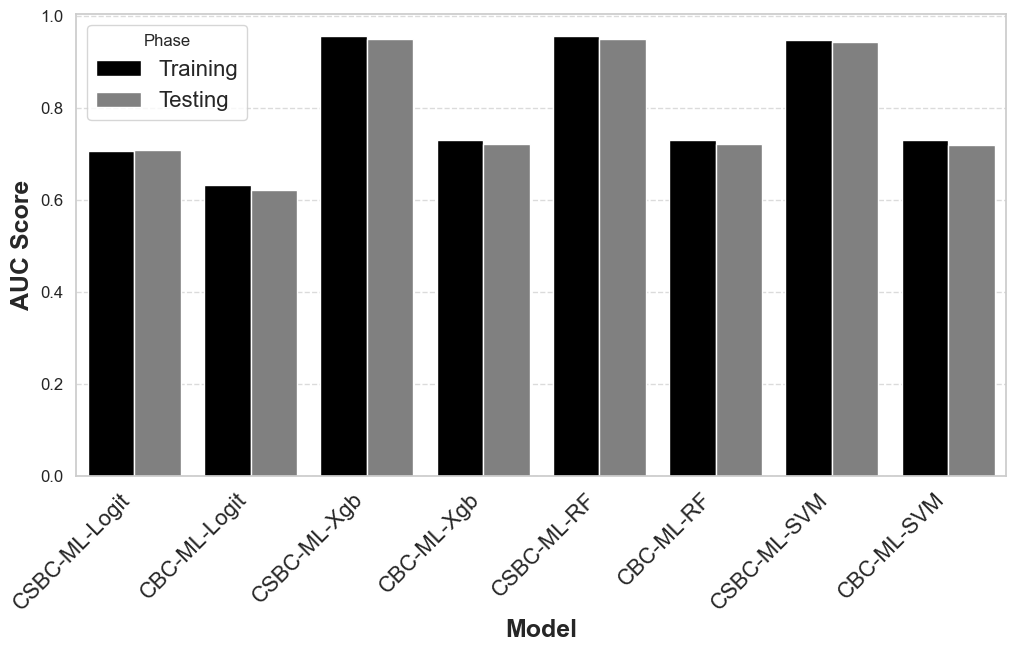

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names
models = [
    "CSBC-ML-Logit", "CBC-ML-Logit",
    "CSBC-ML-Xgb", "CBC-ML-Xgb",
    "CSBC-ML-RF", "CBC-ML-RF",
    "CSBC-ML-SVM", "CBC-ML-SVM"
]

# AUC Scores (Training & Testing)
auc_train = [0.7061, 0.6328, 0.9560, 0.7299, 0.9562, 0.7300, 0.9476, 0.7292]
auc_test = [0.7092, 0.6214, 0.9488, 0.7206, 0.9484, 0.7206, 0.9435, 0.7197]

# Convert to DataFrame
df_auc = pd.DataFrame({"Model": models * 2, "Phase": ["Training"] * 8 + ["Testing"] * 8, "AUC Score": auc_train + auc_test})

# Set figure aesthetics using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot grouped bar chart for AUC comparison
ax = sns.barplot(x="Model", y="AUC Score", hue="Phase", data=df_auc, palette=["black", "grey"])

# Formatting for journal-quality visuals
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel("Model", fontsize=18, fontweight="bold")
plt.ylabel("AUC Score", fontsize=18, fontweight="bold")
#plt.title("Comparison of AUC Scores Across Models", fontsize=16, fontweight="bold")
plt.legend(title="Phase", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save high-resolution figure for publication
output_path = r"C:\Road to PhD\Presentation (Progress Report)\Figures\Figures for Publication\auc_comparisonbw.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')

# Show plot
plt.show()

[0]	validation_0-logloss:0.62658
[1]	validation_0-logloss:0.59221
[2]	validation_0-logloss:0.57089
[3]	validation_0-logloss:0.55863
[4]	validation_0-logloss:0.55102
[5]	validation_0-logloss:0.54613
[6]	validation_0-logloss:0.54401
[7]	validation_0-logloss:0.54011
[8]	validation_0-logloss:0.53758
[9]	validation_0-logloss:0.53642
[10]	validation_0-logloss:0.53468
[11]	validation_0-logloss:0.53363
[12]	validation_0-logloss:0.53277
[13]	validation_0-logloss:0.53195
[14]	validation_0-logloss:0.53149
[15]	validation_0-logloss:0.53055
[16]	validation_0-logloss:0.53023
[17]	validation_0-logloss:0.52964
[18]	validation_0-logloss:0.52928
[19]	validation_0-logloss:0.52896
[20]	validation_0-logloss:0.52849
[21]	validation_0-logloss:0.52832
[22]	validation_0-logloss:0.52821
[23]	validation_0-logloss:0.52812
[24]	validation_0-logloss:0.52798
[25]	validation_0-logloss:0.52783
[26]	validation_0-logloss:0.52750
[27]	validation_0-logloss:0.52742
[28]	validation_0-logloss:0.52724
[29]	validation_0-loglos

[0]	validation_0-logloss:0.62658
[1]	validation_0-logloss:0.59221
[2]	validation_0-logloss:0.57089
[3]	validation_0-logloss:0.55863
[4]	validation_0-logloss:0.55102
[5]	validation_0-logloss:0.54613
[6]	validation_0-logloss:0.54401
[7]	validation_0-logloss:0.54011
[8]	validation_0-logloss:0.53758
[9]	validation_0-logloss:0.53642
[10]	validation_0-logloss:0.53468
[11]	validation_0-logloss:0.53363
[12]	validation_0-logloss:0.53277
[13]	validation_0-logloss:0.53195
[14]	validation_0-logloss:0.53149
[15]	validation_0-logloss:0.53055
[16]	validation_0-logloss:0.53023
[17]	validation_0-logloss:0.52964
[18]	validation_0-logloss:0.52928
[19]	validation_0-logloss:0.52896
[20]	validation_0-logloss:0.52849
[21]	validation_0-logloss:0.52832
[22]	validation_0-logloss:0.52821
[23]	validation_0-logloss:0.52812
[24]	validation_0-logloss:0.52798
[25]	validation_0-logloss:0.52783
[26]	validation_0-logloss:0.52750
[27]	validation_0-logloss:0.52742
[28]	validation_0-logloss:0.52724
[29]	validation_0-loglos

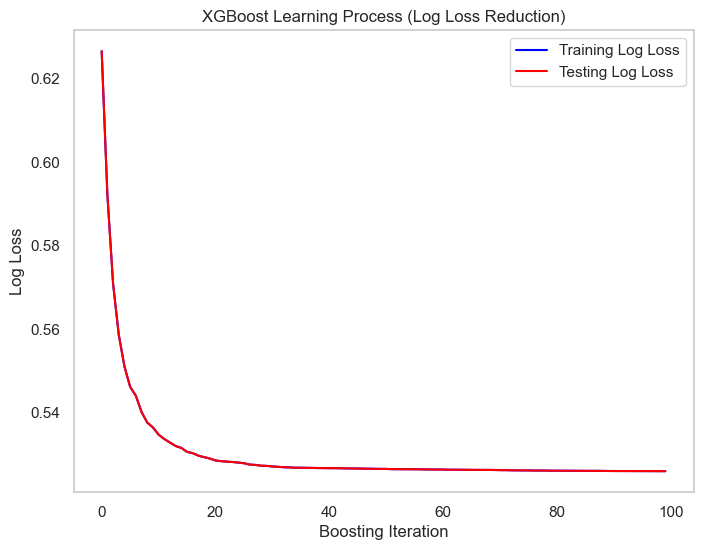

In [1877]:
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np


import xgboost as xgb

# Initialize XGBoost with early stopping parameter
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", 
                              early_stopping_rounds=10)

# Train with evaluation set
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=True)

# Access evaluation results
train_logloss = xgb_model.evals_result()['validation_0']['logloss']
test_logloss = xgb_model.evals_result()['validation_0']['logloss']

# Plot Log Loss Over Iterations
plt.figure(figsize=(8, 6))
plt.plot(train_logloss, label="Training Log Loss", color='blue')
plt.plot(test_logloss, label="Testing Log Loss", color='red')
plt.xlabel("Boosting Iteration")
plt.ylabel("Log Loss")
plt.title("XGBoost Learning Process (Log Loss Reduction)")
plt.legend()
plt.grid()
plt.show()

In [1880]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 1200x600 with 0 Axes>

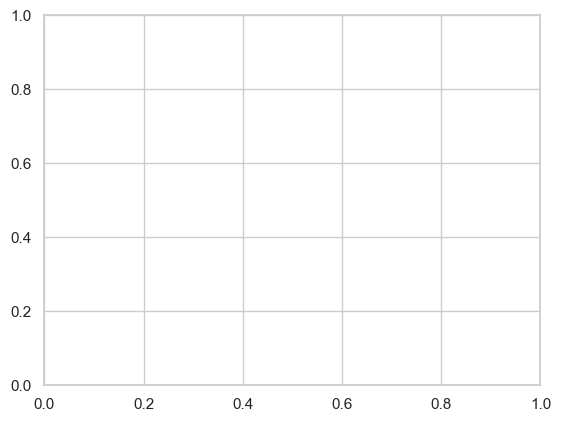

In [1882]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree
plt.figure(figsize=(12, 6))
plot_tree(xgb_model, num_trees=0)
plt.show()